Projet - Analyse explo

In [78]:
# Chargement des librairies n√©cessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(repr)

In [79]:
options(repr.plot.width=15, repr.plot.height=8)

## GRAPH SETTINGS ##
# Save original parameters (optional)
original_par <- par(no.readonly = TRUE)

# Set global scaling factors (1.5x default size)
par(
  cex.lab = 1.5,   # Axis labels
  cex.axis = 1.5,  # Axis text (tick labels)
  cex.main = 1.5,  # Main title
  cex.sub = 1.5    # Subtitle
)

# Define a custom theme with larger fonts
custom_theme <- theme(
  text = element_text(size = 16),            # Global text size
  axis.title = element_text(size = 18),      # Axis labels
  axis.text = element_text(size = 14),       # Axis tick labels
  plot.title = element_text(size = 20),      # Main title
  plot.subtitle = element_text(size = 16)    # Subtitle
)

# Apply the theme to all future plots
theme_set(custom_theme)

### Introduction

In [80]:
# Lecture des donn√©es
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
gym <- read.table(paste(path, "gym_members_exercise_tracking.csv", sep = ""),
                    sep = ",", header = TRUE)
# Premi√®res lignes du jeu de donn√©es
head(gym)
# V√©rification du contenu
summary(gym)

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM
1 56  Male   88.3        1.71       180     157     60         
2 46  Female 74.9        1.53       179     151     66         
3 32  Female 68.1        1.66       167     122     54         
4 25  Male   53.2        1.70       190     164     56         
5 38  Male   46.1        1.79       188     158     68         
6 56  Female 58.0        1.68       168     156     74         
  Session_Duration..hours. Calories_Burned Workout_Type Fat_Percentage
1 1.69                     1313            Yoga         12.6          
2 1.30                      883            HIIT         33.9          
3 1.11                      677            Cardio       33.4          
4 0.59                      532            Strength     28.8          
5 0.64                      556            Strength     29.2          
6 1.59                     1116            HIIT         15.5          
  Water_Intake..liters. Workout_Frequency..days.week. Experience_Level BMI  
1 3.5                   4                             3                30.20
2 2.1                   4                             2                32.00
3 2.3                   4                             2                24.71
4 2.1                   3                             1                18.41
5 2.8                   3                             1                14.39
6 2.7                   5                             3                20.55

      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

Ce jeu de donn√©es fournit un aper√ßu d√©taill√© des routines d‚Äôexercice, des attributs physiques et des mesures
de la condition physique des membres d‚Äôune salle de sport. Il contient 15 variables observ√©es chez 973 individus
fr√©quentant une salle de sport:
- Age : √¢ge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative √† deux modalit√©s : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en m√®tres.
- Max_BPM : Fr√©quence cardiaque maximale (battements par minute) pendant les s√©ances d‚Äôentra√Ænement.
- Avg_BPM : Fr√©quence cardiaque moyenne pendant les s√©ances d‚Äôentra√Ænement.
- Resting_BPM : Fr√©quence cardiaque au repos avant l‚Äôentra√Ænement.
- Session_Duration..hours. : Dur√©e de chaque s√©ance d‚Äôentra√Ænement en heures.
- Calories_Burned : Total des calories br√ªl√©es au cours de chaque s√©ance.
- Workout_Type : Type d‚Äôentra√Ænement effectu√© (qualitative √† 4 modalit√©s : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d‚Äôeau pendant les s√©ances d‚Äôentra√Ænement.
- Workout_Frequency..days.week. : Nombre de s√©ances d‚Äôentra√Ænement par semaine (qualitative √† 4
modalit√©s : 2 √† 5).
- Experience_Level : Niveau d‚Äôexp√©rience (qualitative √† 3 modalit√©s : 1 pour d√©butant √† 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calcul√© √† partir de la taille et du poids.

Dans ce projet, on souhaite dans un premier temps, pr√©dire la variable Calories_Burned √† partir de toutes
les autres variables, et dans un second temps, pr√©dire la variable Experience_Level √† partir de toutes les autres
variables (dont Calories_Burned).

In [ ]:
gym[,'Gender'] <- as.factor(gym[,'Gender'])
gym[,'Workout_Type'] <- as.factor(gym[,'Workout_Type'])
gym[,'Experience_Level'] <- as.factor(gym[,'Experience_Level'])
gym[,'Workout_Frequency..days.week.'] <- as.factor(gym[,'Workout_Frequency..days.week.'])

# drop BMI column because redundant with Weight and Height
# gym <- gym[,-c(15)]

In [82]:
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

On distingue

11 variables quantitatives : Age, Weight, Height, Max_BPM, Avg_BPM, Resting_BPM, Session_duration, Calories Burned, Fat_Percentage, Water_Intake,BMI


4 variables qualitatives : Gender, Workout_Type, Workout_frequency, Experience_level

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


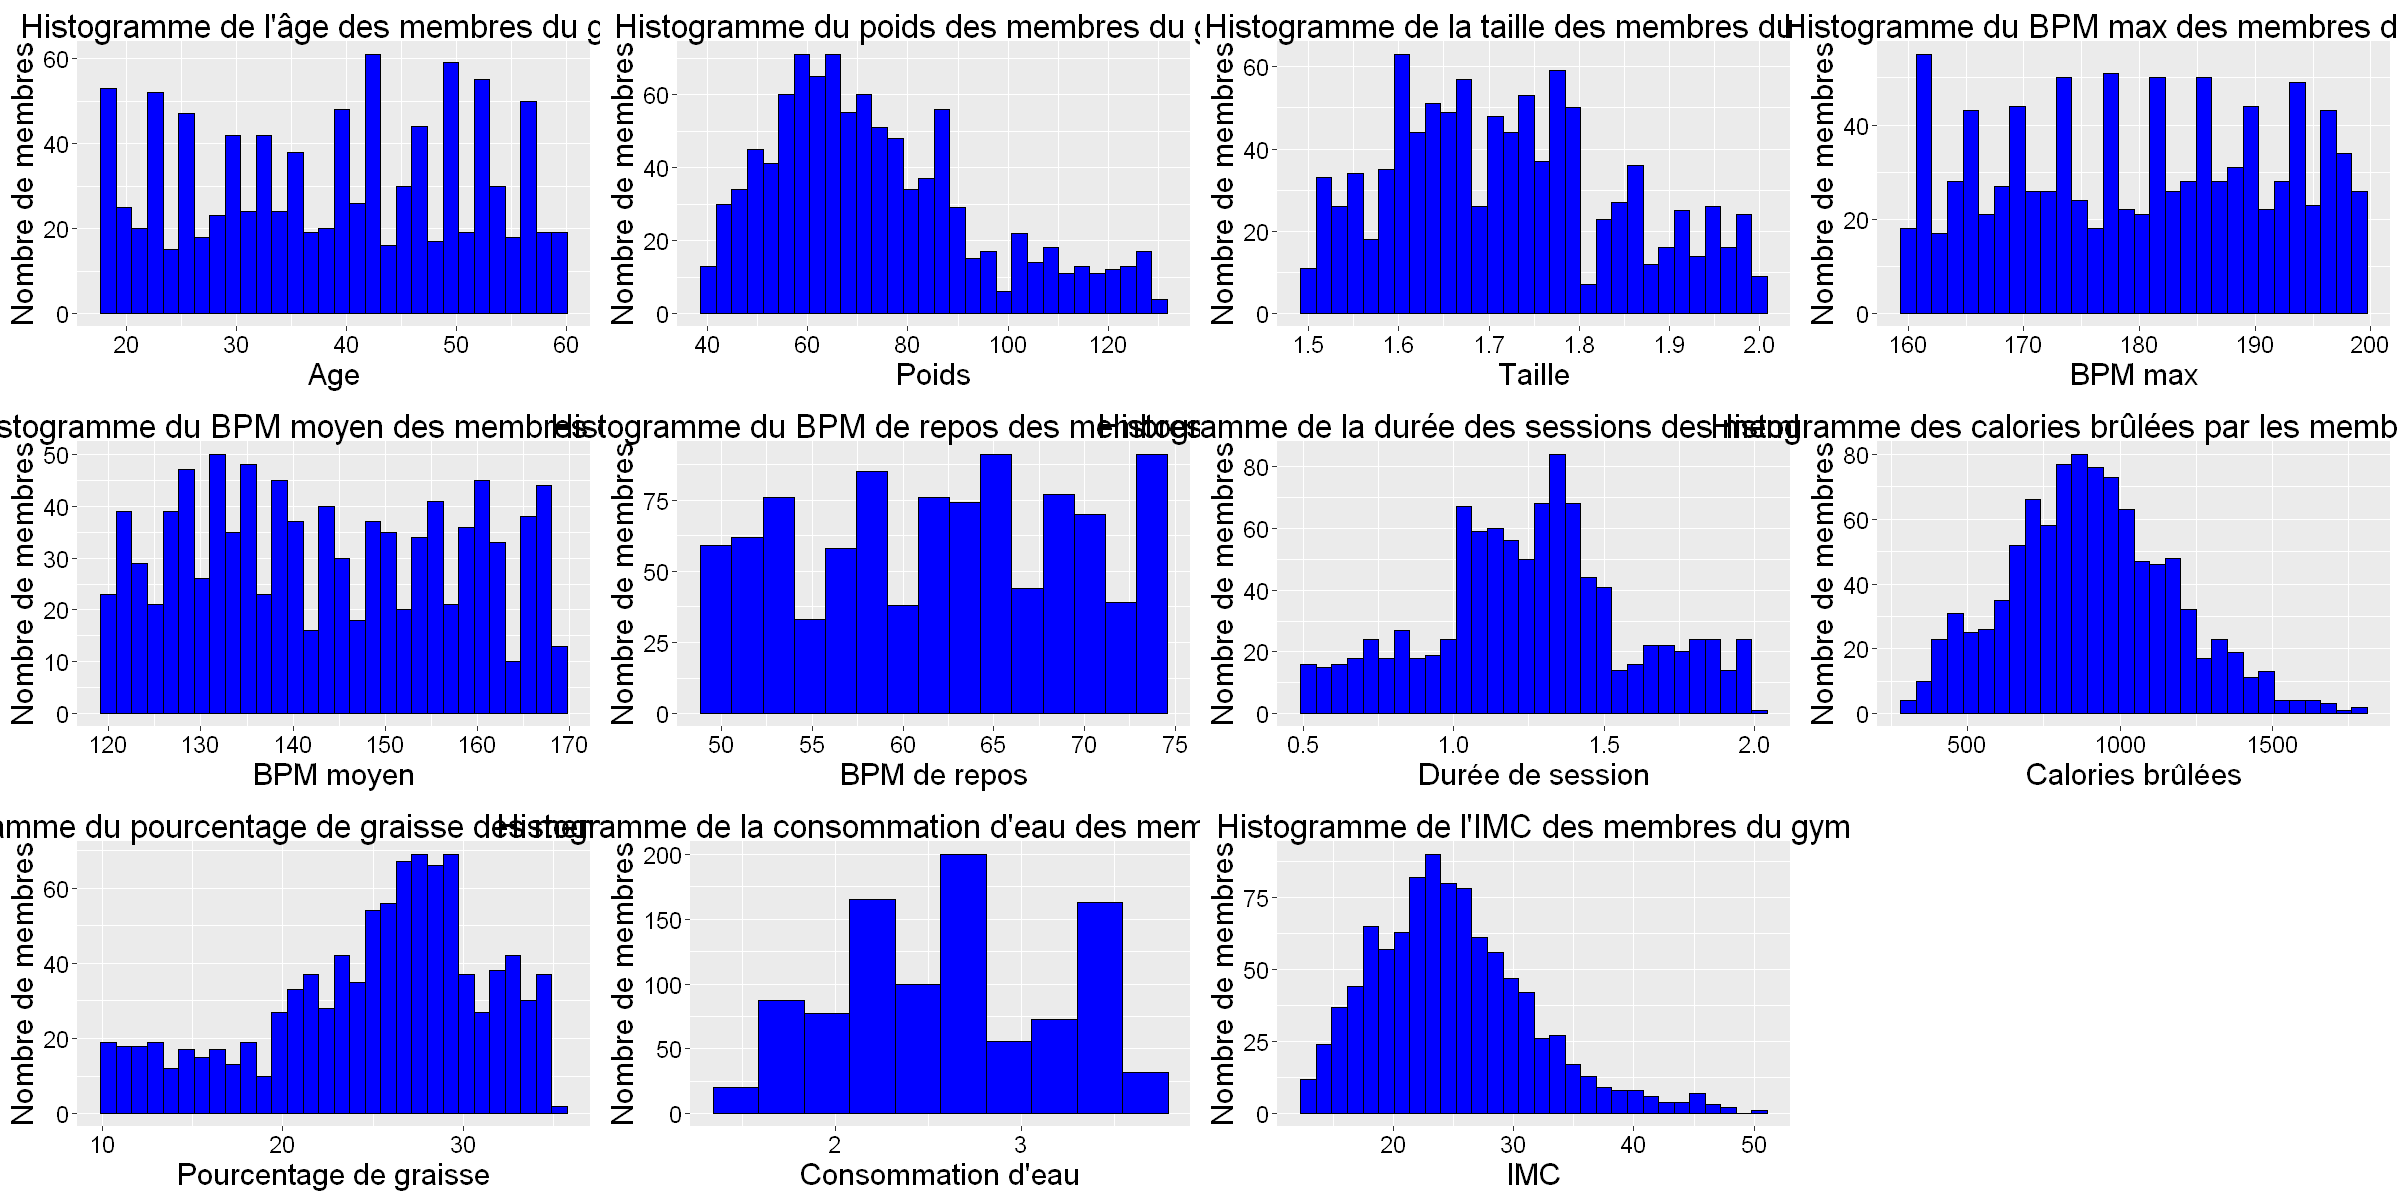

In [83]:
# Age	Gender	Weight..kg.	Height..m.	Max_BPM	Avg_BPM	Resting_BPM	Session_Duration..hours.	Calories_Burned	Workout_Type	Fat_Percentage	Water_Intake..liters.	Workout_Frequency..days.week.	Experience_Level	BMI
options(repr.plot.width=20, repr.plot.height=10)

g1<- ggplot(gym, aes(Age)) + geom_histogram( fill = "blue", color = "black") + labs(title = "Histogramme de l'√¢ge des membres du gym", x = "Age", y = "Nombre de membres")
g2<- ggplot(gym, aes(Weight..kg.)) + geom_histogram( fill = "blue", color = "black") + labs(title = "Histogramme du poids des membres du gym", x = "Poids", y = "Nombre de membres")
g3<- ggplot(gym, aes(Height..m.)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de la taille des membres du gym", x = "Taille", y = "Nombre de membres")
g4 <- ggplot(gym, aes(Max_BPM)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du BPM max des membres du gym", x = "BPM max", y = "Nombre de membres")
g5 <- ggplot(gym, aes(Avg_BPM)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du BPM moyen des membres du gym", x = "BPM moyen", y = "Nombre de membres")
g6 <- ggplot(gym, aes(Resting_BPM)) + geom_histogram(bins=15, fill = "blue", color = "black") + labs(title = "Histogramme du BPM de repos des membres du gym", x = "BPM de repos", y = "Nombre de membres")
g7 <- ggplot(gym, aes(Session_Duration..hours.)) + geom_histogram( fill = "blue", color = "black") + labs(title = "Histogramme de la dur√©e des sessions des membres du gym", x = "Dur√©e de session", y = "Nombre de membres")
g8 <- ggplot(gym, aes(Calories_Burned)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme des calories br√ªl√©es par les membres du gym", x = "Calories br√ªl√©es", y = "Nombre de membres")
g9 <- ggplot(gym, aes(Fat_Percentage)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du pourcentage de graisse des membres du gym", x = "Pourcentage de graisse", y = "Nombre de membres")
g10 <- ggplot(gym, aes(Water_Intake..liters.)) + geom_histogram(bins=10, fill = "blue", color = "black") + labs(title = "Histogramme de la consommation d'eau des membres du gym", x = "Consommation d'eau", y = "Nombre de membres")
g12 <- ggplot(gym, aes(BMI)) + geom_histogram( fill = "blue", color = "black") + labs(title = "Histogramme de l'IMC des membres du gym", x = "IMC", y = "Nombre de membres")

grid.arrange(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g12, ncol = 4)
rm(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10,  g12)

# Observations et Pr√©paration des Donn√©es 


Les histogrammes montrent la distribution des diff√©rentes variables quantitatives dans le jeu de donn√©es.


En analysant les histogrammes, nous remarquons plusieurs points importants :  


- Certaines variables, comme **calories brul√©es, dur√©e de session et consommation d'eau**, suivent une distribution normale.  
- D'autres variables, comme **IMC, poids et pourcentage de graisse**, pr√©sentent une forte asym√©trie et devront √™tre transform√©es.  
- Toutes les variales restantes pr√©sentent une trop grosse variabilit√©s des valeurs pour √™tre transform√©es

üëâ **Conclusion** : Certaines variables pr√©sentent des √©carts d'√©chelle importants, ce qui peut affecter nos analyses. Nous allons donc proc√©der √† des transformations et normalisations dans la section suivante.  




## Transformation de variables

In [84]:
gym[, "SBMI"] <- sqrt(gym[,"BMI"])
gym[, "LBMI"] <- log(gym[,"BMI"])
gym[, "LWeight"] <- log(gym[,"Weight..kg."])
gym[, "SWeight"] <- sqrt(gym[,"Weight..kg."])

max_fat = max(gym[,"Fat_Percentage"])
gym[, "SFat_Percentage"] <- sqrt((max_fat + 1) - gym[,"Fat_Percentage"])
gym[, "LFat_Percentage"] <- log((max_fat + 1) - gym[,"Fat_Percentage"])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


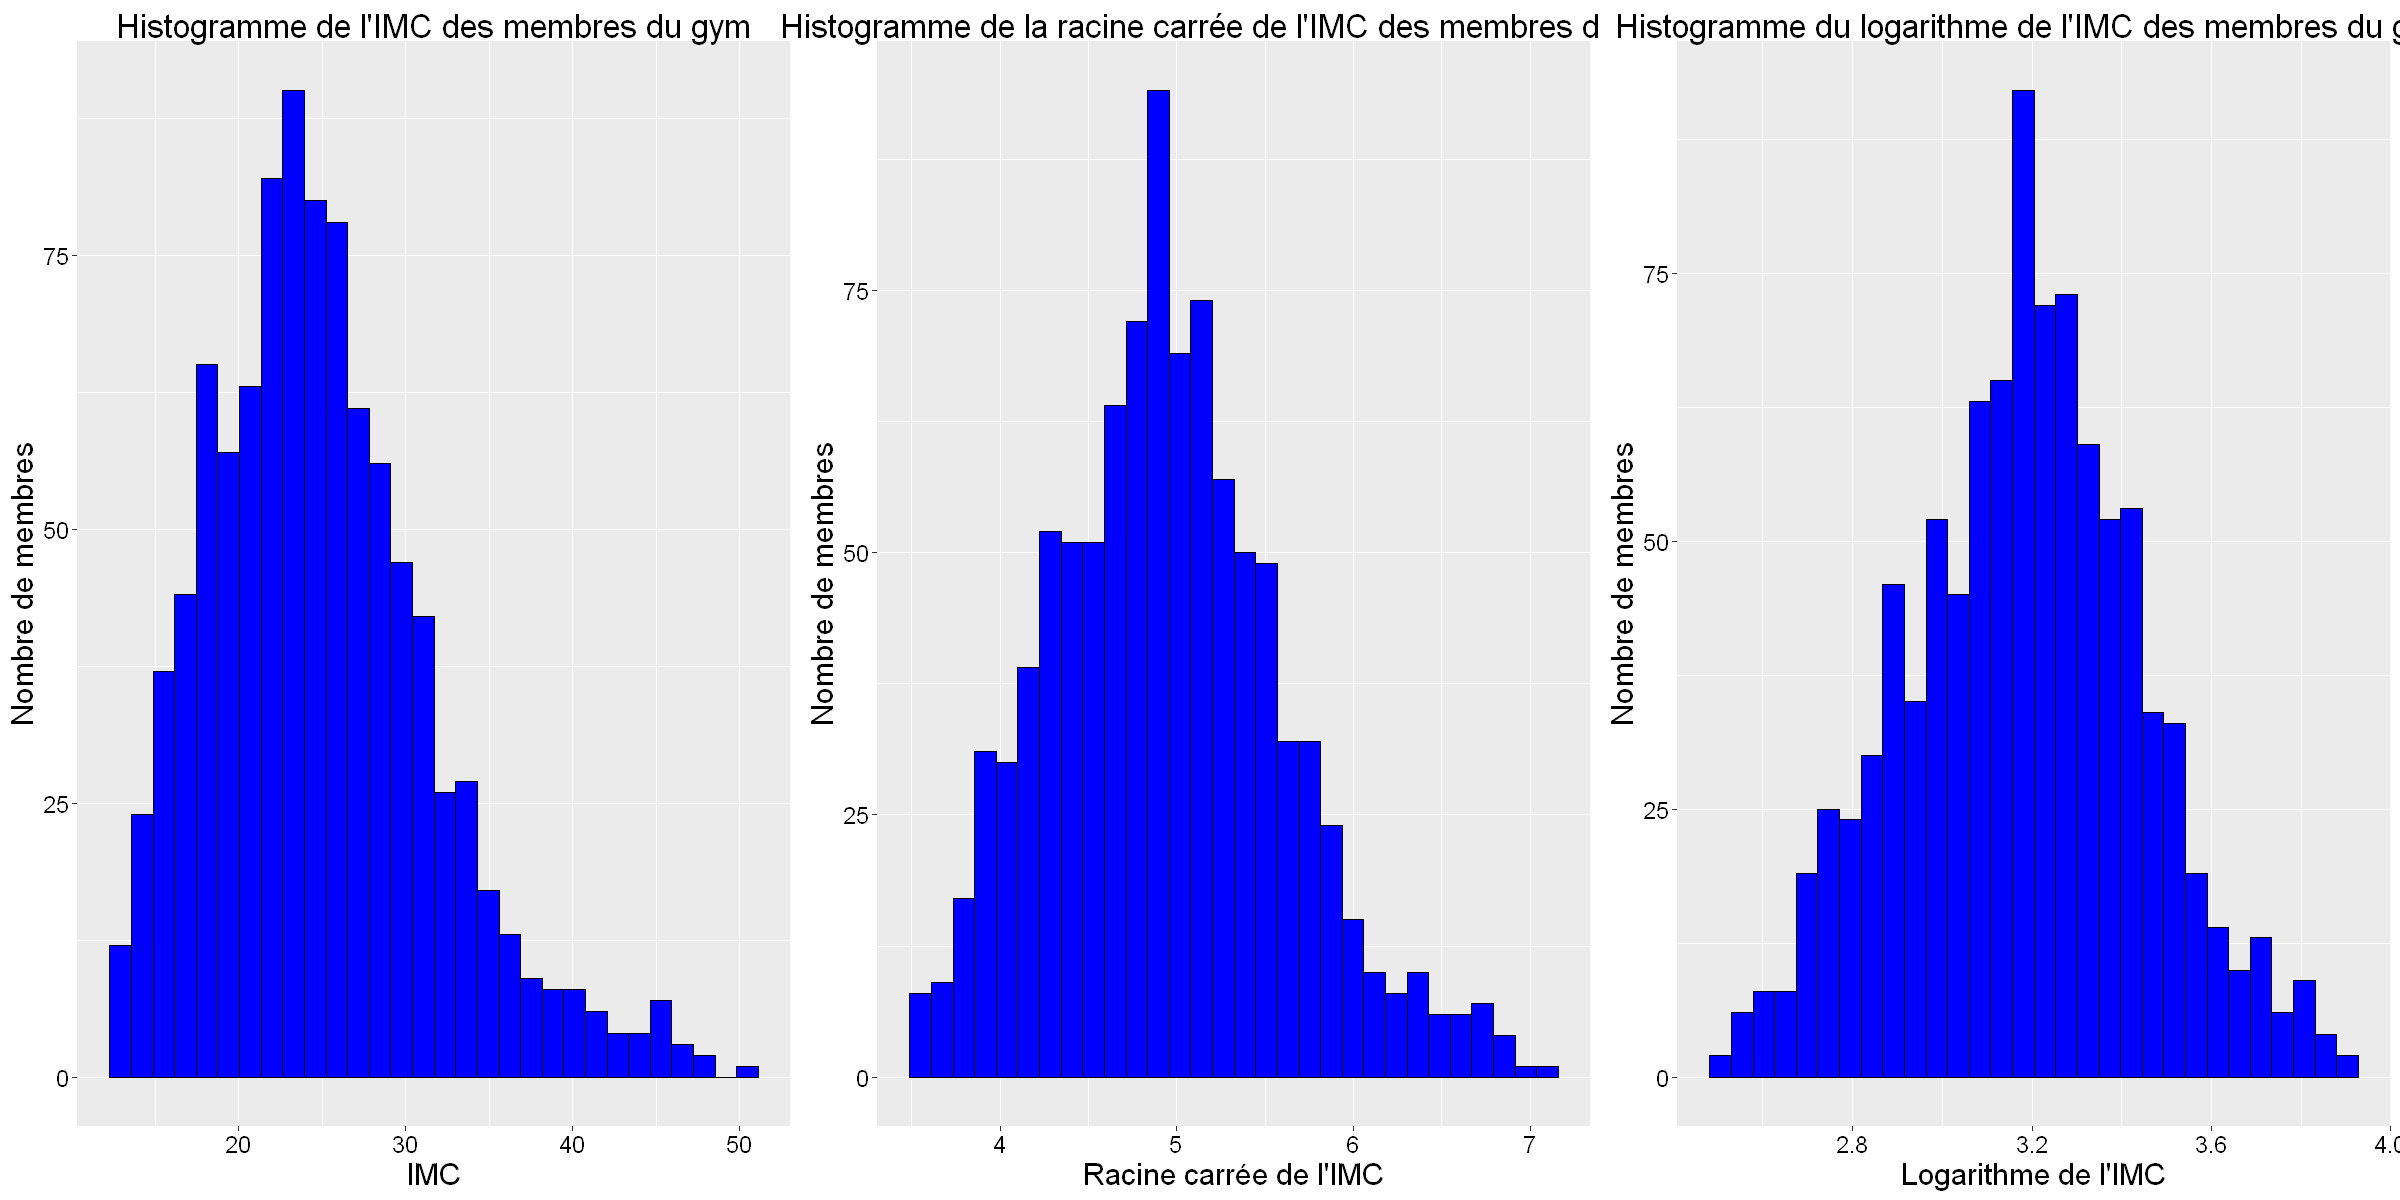

In [85]:
# Tracer les histogrammes de IMC Weight..kg. Fat_Percentage et les transformations
options(repr.plot.width=20, repr.plot.height=10)
g1 <- ggplot(gym, aes(BMI)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de l'IMC des membres du gym", x = "IMC", y = "Nombre de membres")
g2 <- ggplot(gym, aes(SBMI)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de la racine carr√©e de l'IMC des membres du gym", x = "Racine carr√©e de l'IMC", y = "Nombre de membres")
g3 <- ggplot(gym, aes(LBMI)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du logarithme de l'IMC des membres du gym", x = "Logarithme de l'IMC", y = "Nombre de membres")



grid.arrange(g1, g2, g3, ncol = 3)
rm(g1, g2, g3)


Suite √† ces transformations, nous observons que la troisi√®me transformation, qui consiste √† appliquer le logarithme √† l'IMC, est celle que nous allons retenir, car elle pr√©sente la distribution la plus proche de la normale.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


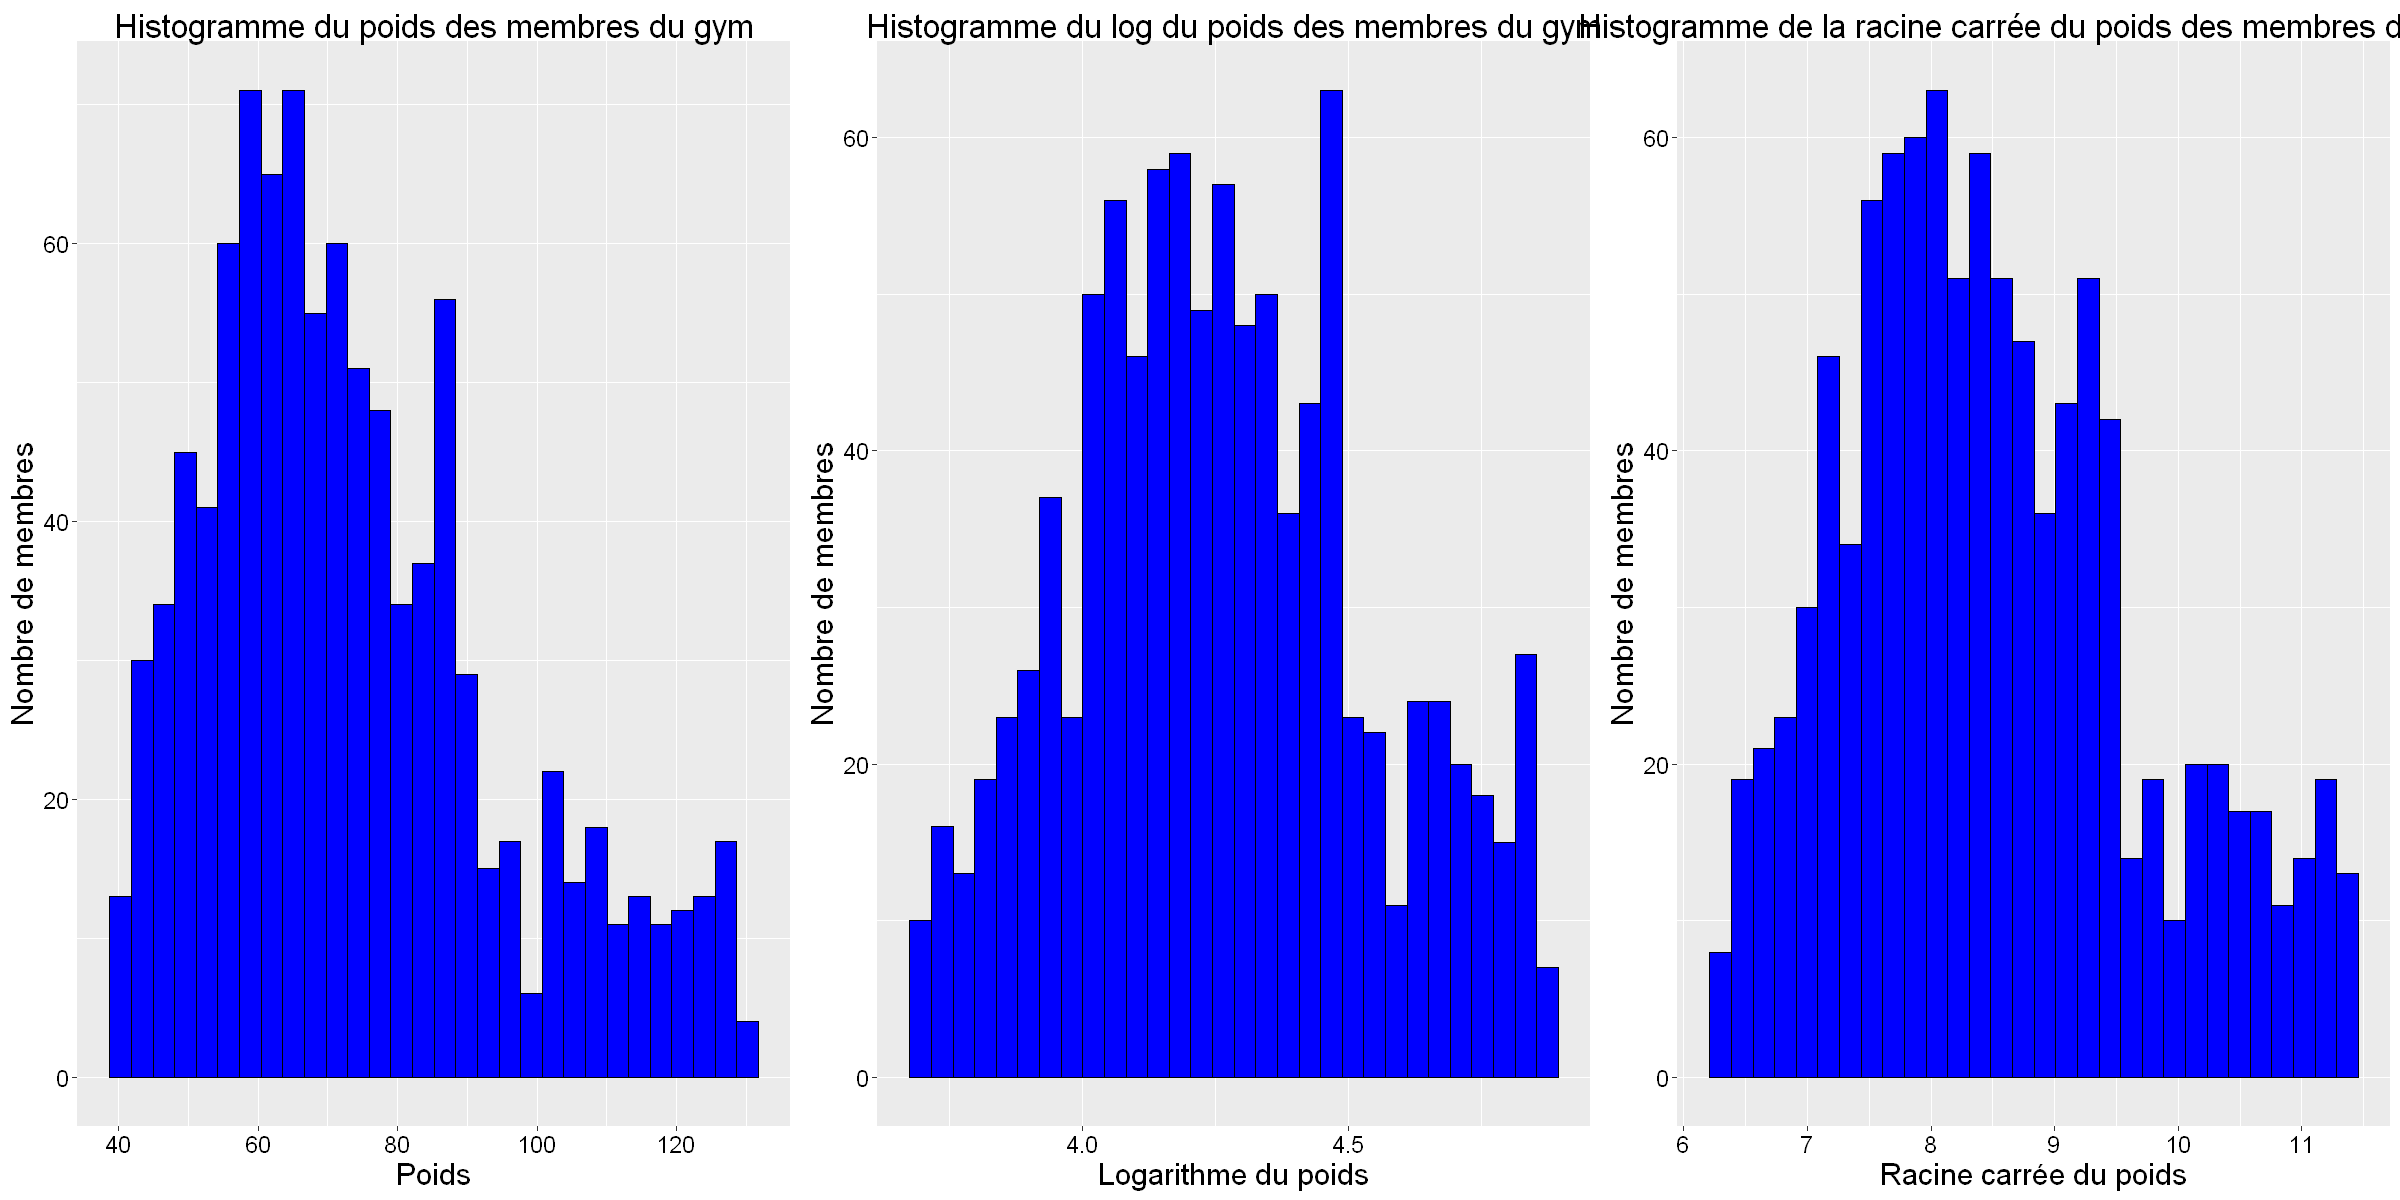

In [86]:
g4 <- ggplot(gym, aes(Weight..kg.)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du poids des membres du gym", x = "Poids", y = "Nombre de membres")
g5 <- ggplot(gym, aes(LWeight)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du log du poids des membres du gym", x = "Logarithme du poids", y = "Nombre de membres")
g6 <- ggplot(gym, aes(SWeight)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de la racine carr√©e du poids des membres du gym", x = "Racine carr√©e du poids", y = "Nombre de membres")
grid.arrange(g4, g5,g6, ncol = 3)
rm(g4, g5, g6)


Suite √† ces transformations, nous observons que la deuxi√®me transformation, qui consiste √† appliquer le logarithme √† l'IMC, est celle que nous allons retenir, car elle pr√©sente la distribution la plus proche de la normale.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


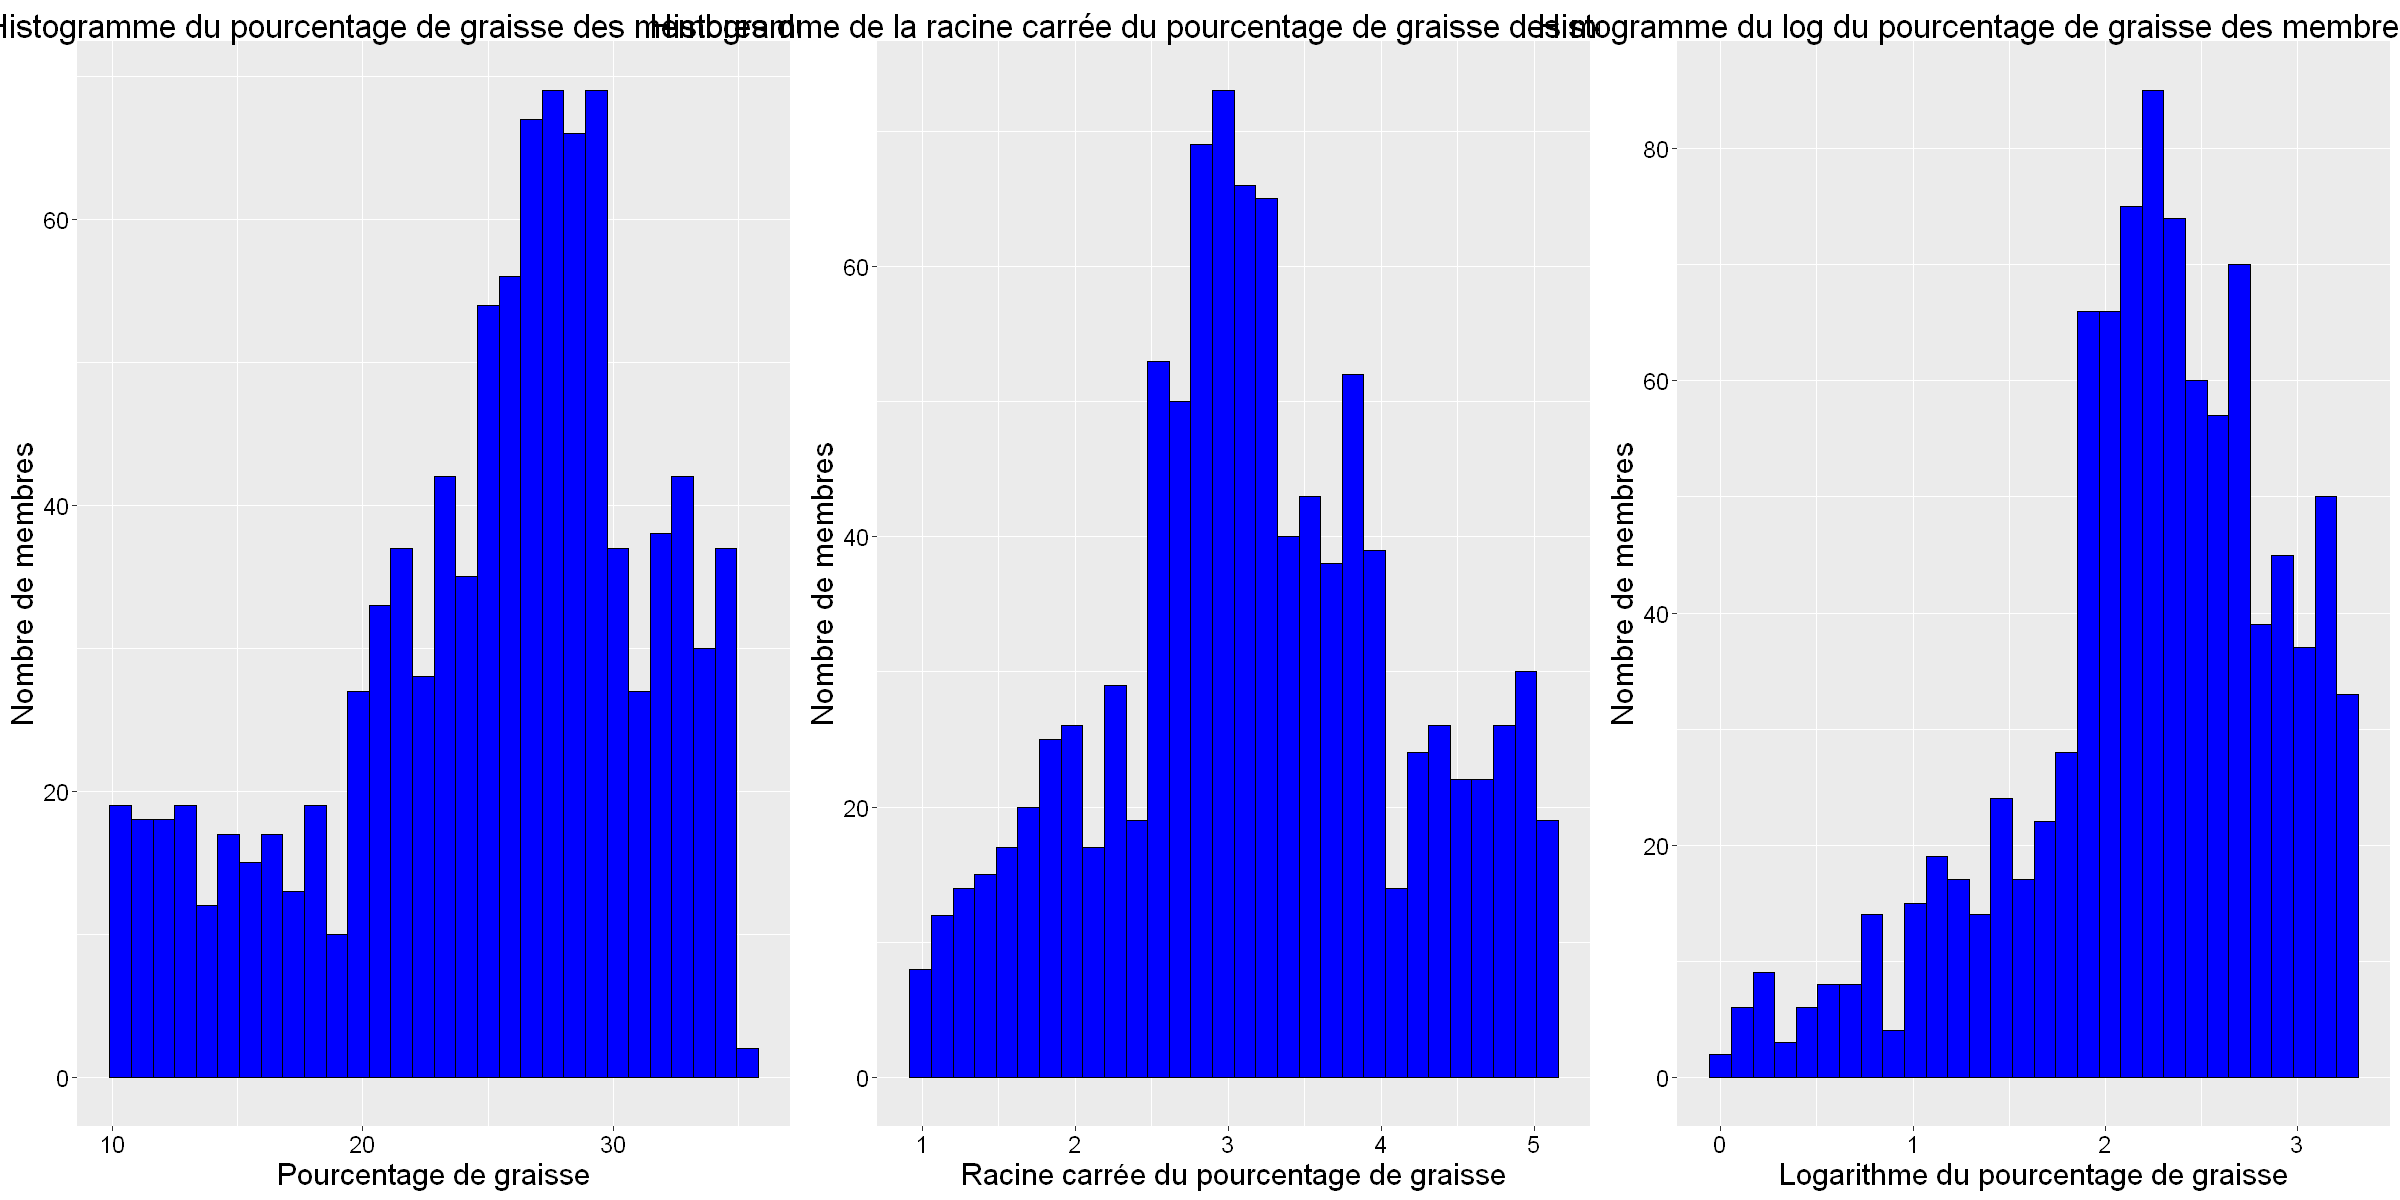

In [87]:
g7 <- ggplot(gym, aes(Fat_Percentage)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du pourcentage de graisse des membres du gym", x = "Pourcentage de graisse", y = "Nombre de membres")
g8 <- ggplot(gym, aes(SFat_Percentage)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de la racine carr√©e du pourcentage de graisse des membres du gym", x = "Racine carr√©e du pourcentage de graisse", y = "Nombre de membres")
g9 <- ggplot(gym, aes(LFat_Percentage)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du log du pourcentage de graisse des membres du gym", x = "Logarithme du pourcentage de graisse", y = "Nombre de membres")
grid.arrange(g7, g8, g9, ncol = 3)
rm(g7, g8, g9)

Suite √† ces transformations, nous observons que la deuxi√®me transformation, qui consiste √† appliquer la racine carr√©e de Fat_Percentage, est celle que nous allons retenir, car elle pr√©sente la distribution la plus proche de la normale.

In [88]:
gym_analyse <- gym[, c(1:15)]

gym[, "Weight..kg."] <- log(gym[,"Weight..kg."])
gym[, "BMI"] <- log(gym[,"BMI"])

max_fat <- max(gym[,"Fat_Percentage"])
gym[, "Fat_Percentage"] <- sqrt((max_fat + 1) - gym[,"Fat_Percentage"])

# renome les variables Weight..kg. et BMI en LWeight et LBMI
names(gym)[names(gym) == "Weight..kg."] <- "LWeight"
names(gym)[names(gym) == "BMI"] <- "LBMI"
names(gym)[names(gym) == "Fat_Percentage"] <- "SFat_Percentage"

# supprimer les colonnes 16 √† 21
gym <- gym[, -c(16:21)]

In [89]:
summary(gym)

      Age           Gender       LWeight        Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   :3.689   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.:4.062   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median :4.248   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   :4.263   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.:4.454   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :4.867   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0  
 Max

## Variables qualitatives

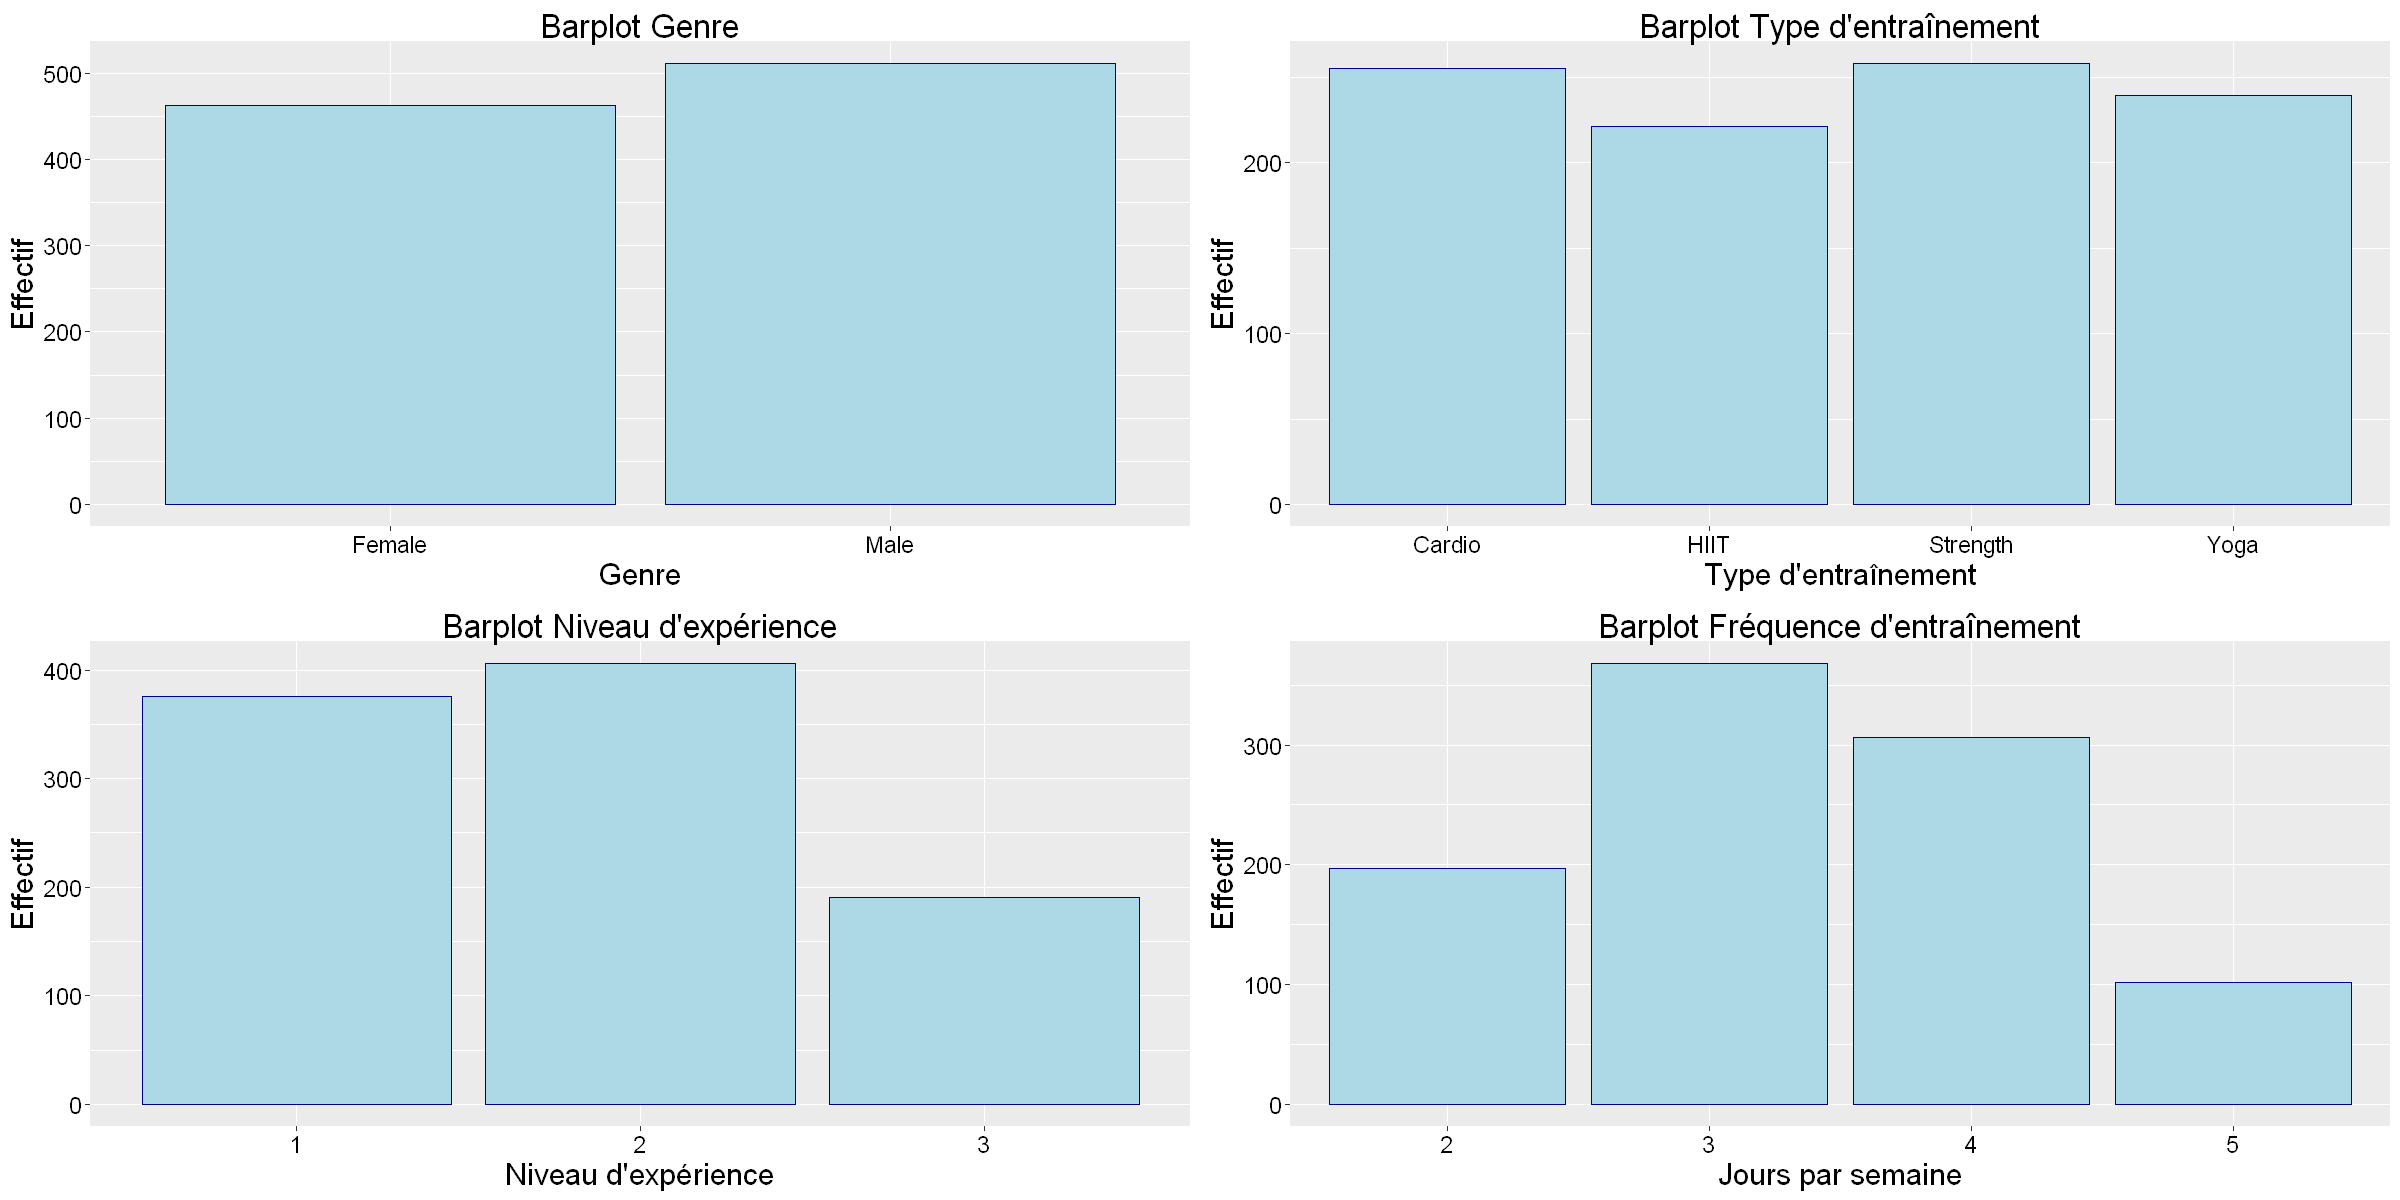

In [90]:
# G√©n√©rer des barplots pour les variables qualitatives
q1 <- ggplot(gym, aes(x = Gender)) +
    geom_bar(fill = "lightblue", color = "darkblue") +
    labs(title = "Barplot Genre", x = "Genre", y = "Effectif")

q2 <- ggplot(gym, aes(x = Workout_Type)) +
    geom_bar(fill = "lightblue", color = "darkblue") +
    labs(title = "Barplot Type d'entra√Ænement", x = "Type d'entra√Ænement", y = "Effectif")

q3 <- ggplot(gym, aes(x = Experience_Level)) +
    geom_bar(fill = "lightblue", color = "darkblue") +
    labs(title = "Barplot Niveau d'exp√©rience", x = "Niveau d'exp√©rience", y = "Effectif")

q4 <- ggplot(gym, aes(x = Workout_Frequency..days.week.)) +
    geom_bar(fill = "lightblue", color = "darkblue") +
    labs(title = "Barplot Fr√©quence d'entra√Ænement", x = "Jours par semaine", y = "Effectif")

grid.arrange(q1, q2, q3, q4, ncol = 2)

rm(q1, q2, q3, q4)


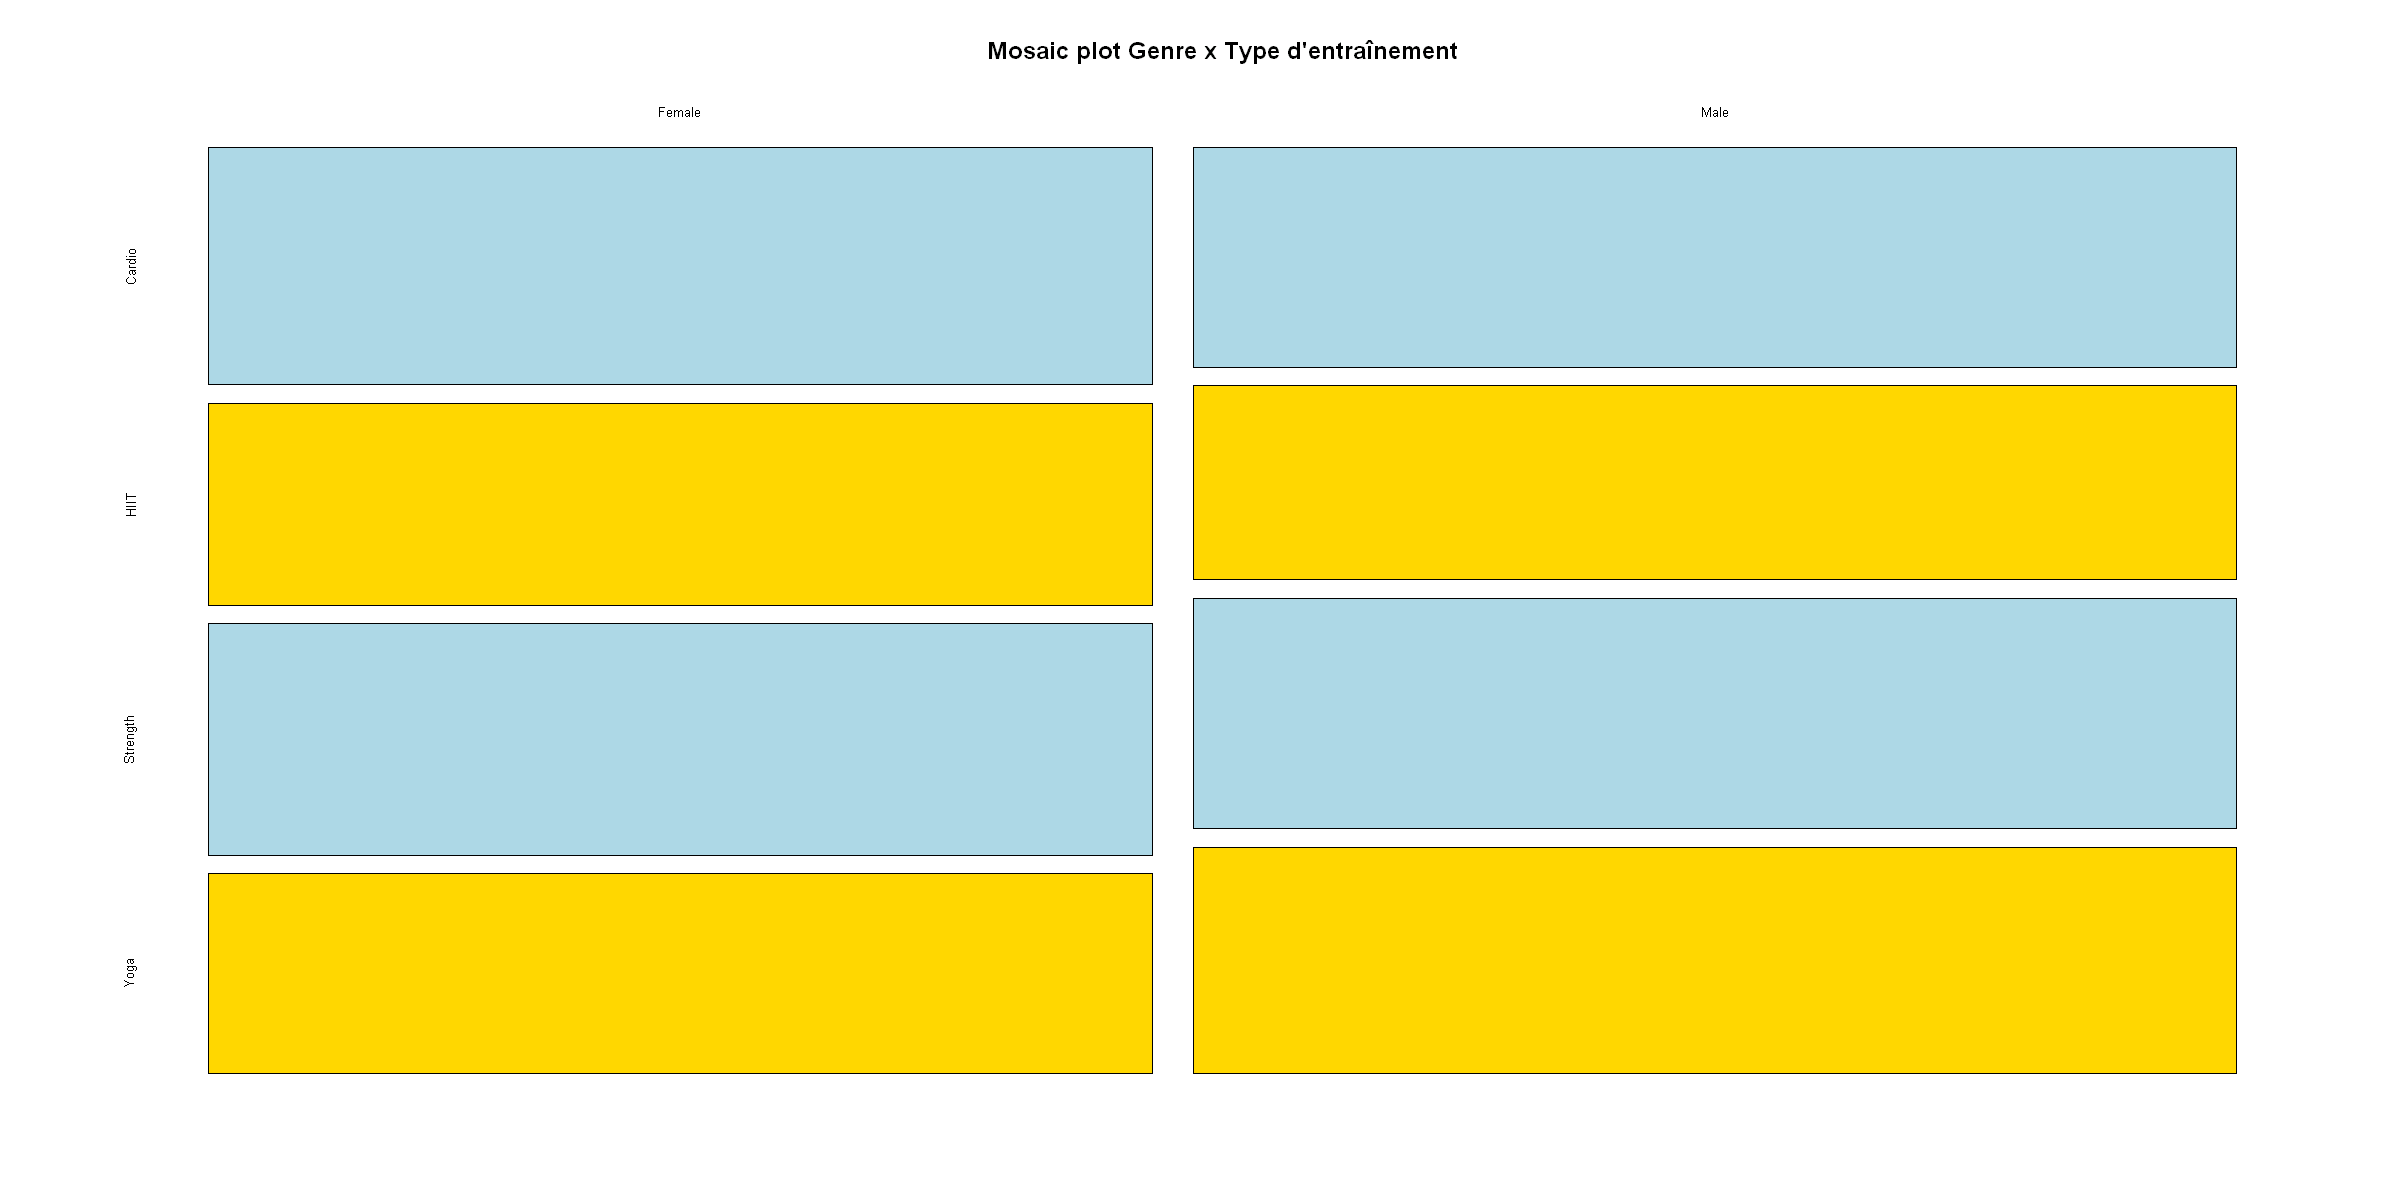

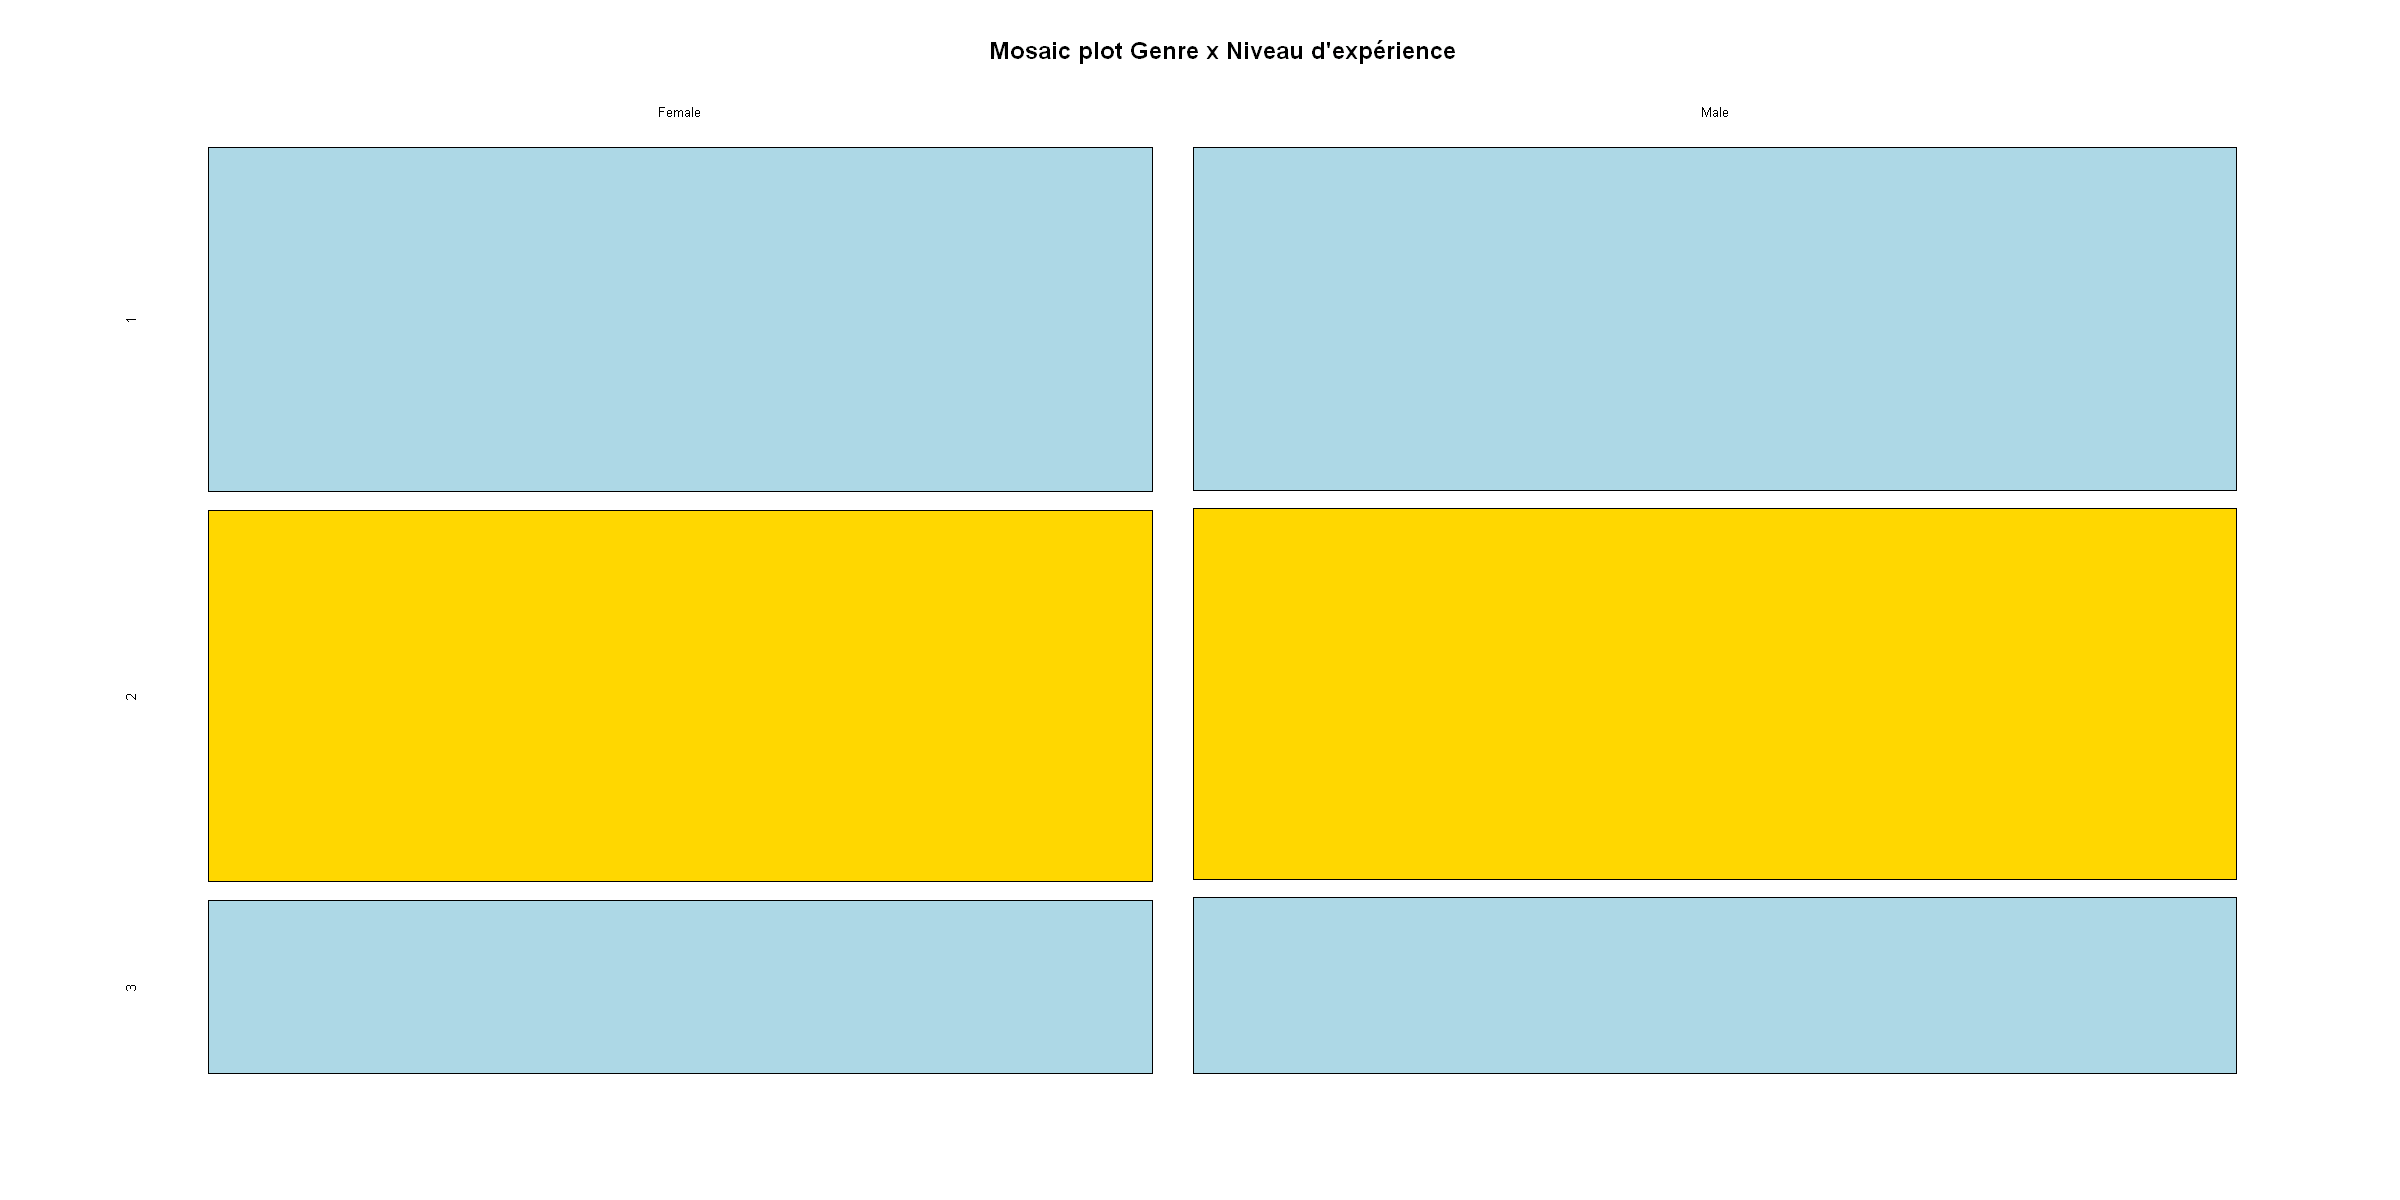

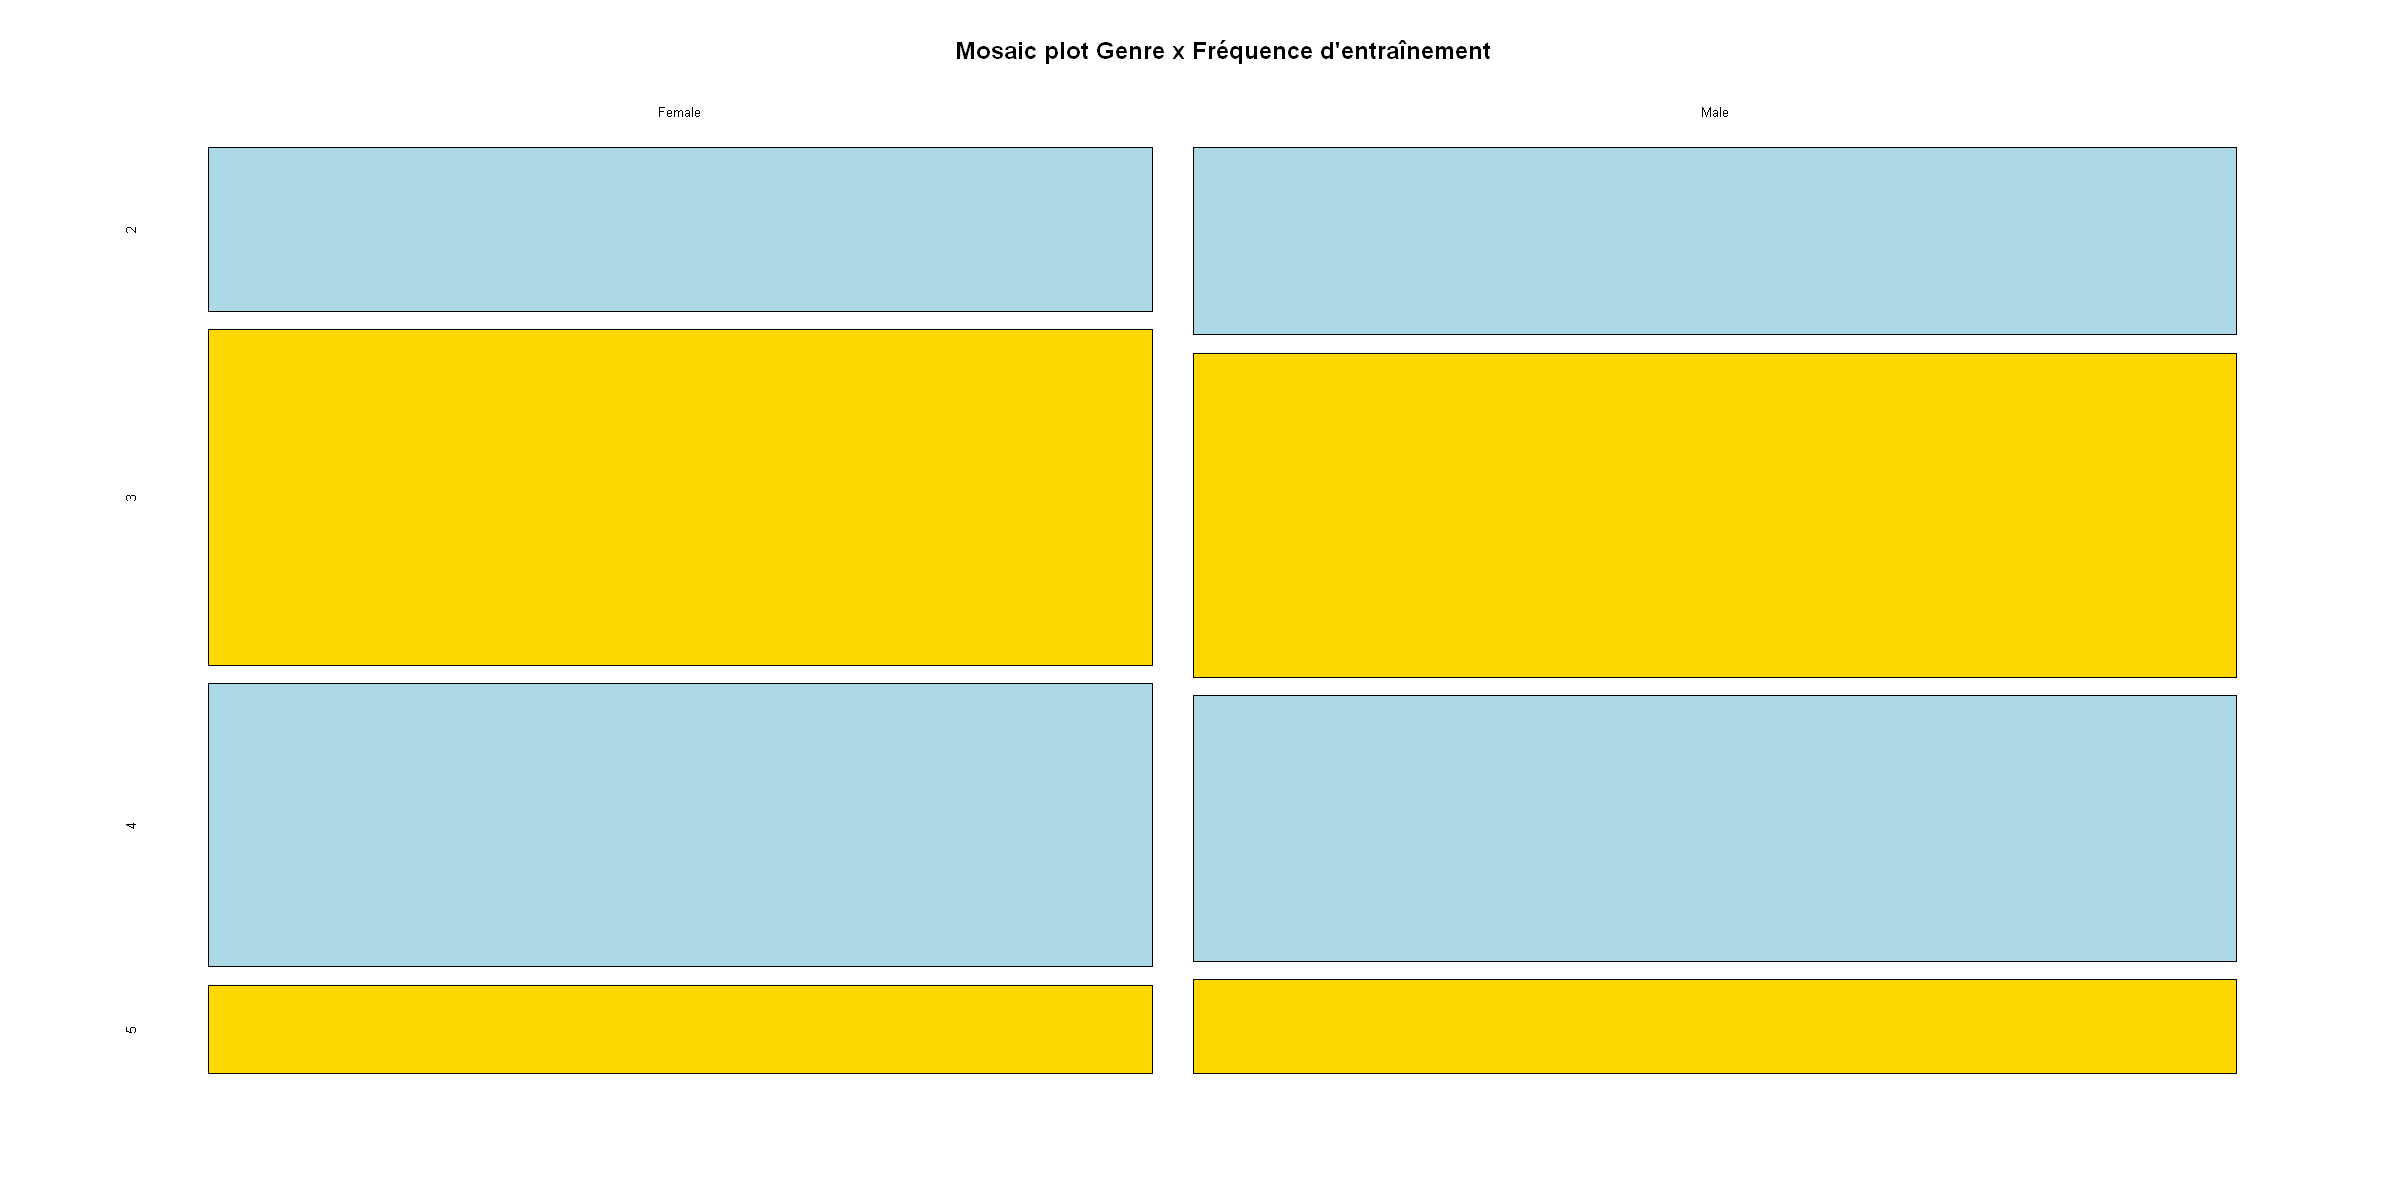

In [91]:
# G√©n√©rer des mosaic plot pour les variables qualitatives

mosaicplot(table(gym$Gender, gym$Workout_Type), main = "Mosaic plot Genre x Type d'entra√Ænement", color = c("lightblue", "gold"))
mosaicplot(table(gym$Gender, gym$Experience_Level), main = "Mosaic plot Genre x Niveau d'exp√©rience", color = c("lightblue", "gold"))
mosaicplot(table(gym$Gender, gym$Workout_Frequency..days.week.), main = "Mosaic plot Genre x Fr√©quence d'entra√Ænement", color = c("lightblue", "gold"))


In [92]:
# selectionner les variables quantitatives
# gym_quanti = gym %>% select (Age, LWeight, Height..m., Max_BPM, Avg_BPM, Resting_BPM, Session_Duration..hours., Calories_Burned, Fat_Percentage, Water_Intake..liters., LBMI)

In [93]:
# ggpairs(gym_quanti)

In [94]:
# corrplot(cor(gym_quanti), method = "ellipse")

## Reduction de dimension par ACP

Nous avons inclus `Calories_Burned` en tant que variable quantitative suppl√©mentaire (`quanti.sup`) pour analyser sa corr√©lation avec les composantes principales, sans influencer leur construction. La variable `Experience_Level` a √©t√© plac√©e en qualitative suppl√©mentaire (`quali.sup`) afin de visualiser les groupes d‚Äôindividus par niveau d‚Äôexp√©rience. Cette approche permet de s√©parer clairement les variables explicatives (actives) des variables √† pr√©dire (suppl√©mentaires), conform√©ment √† l‚Äôobjectif de pr√©diction.

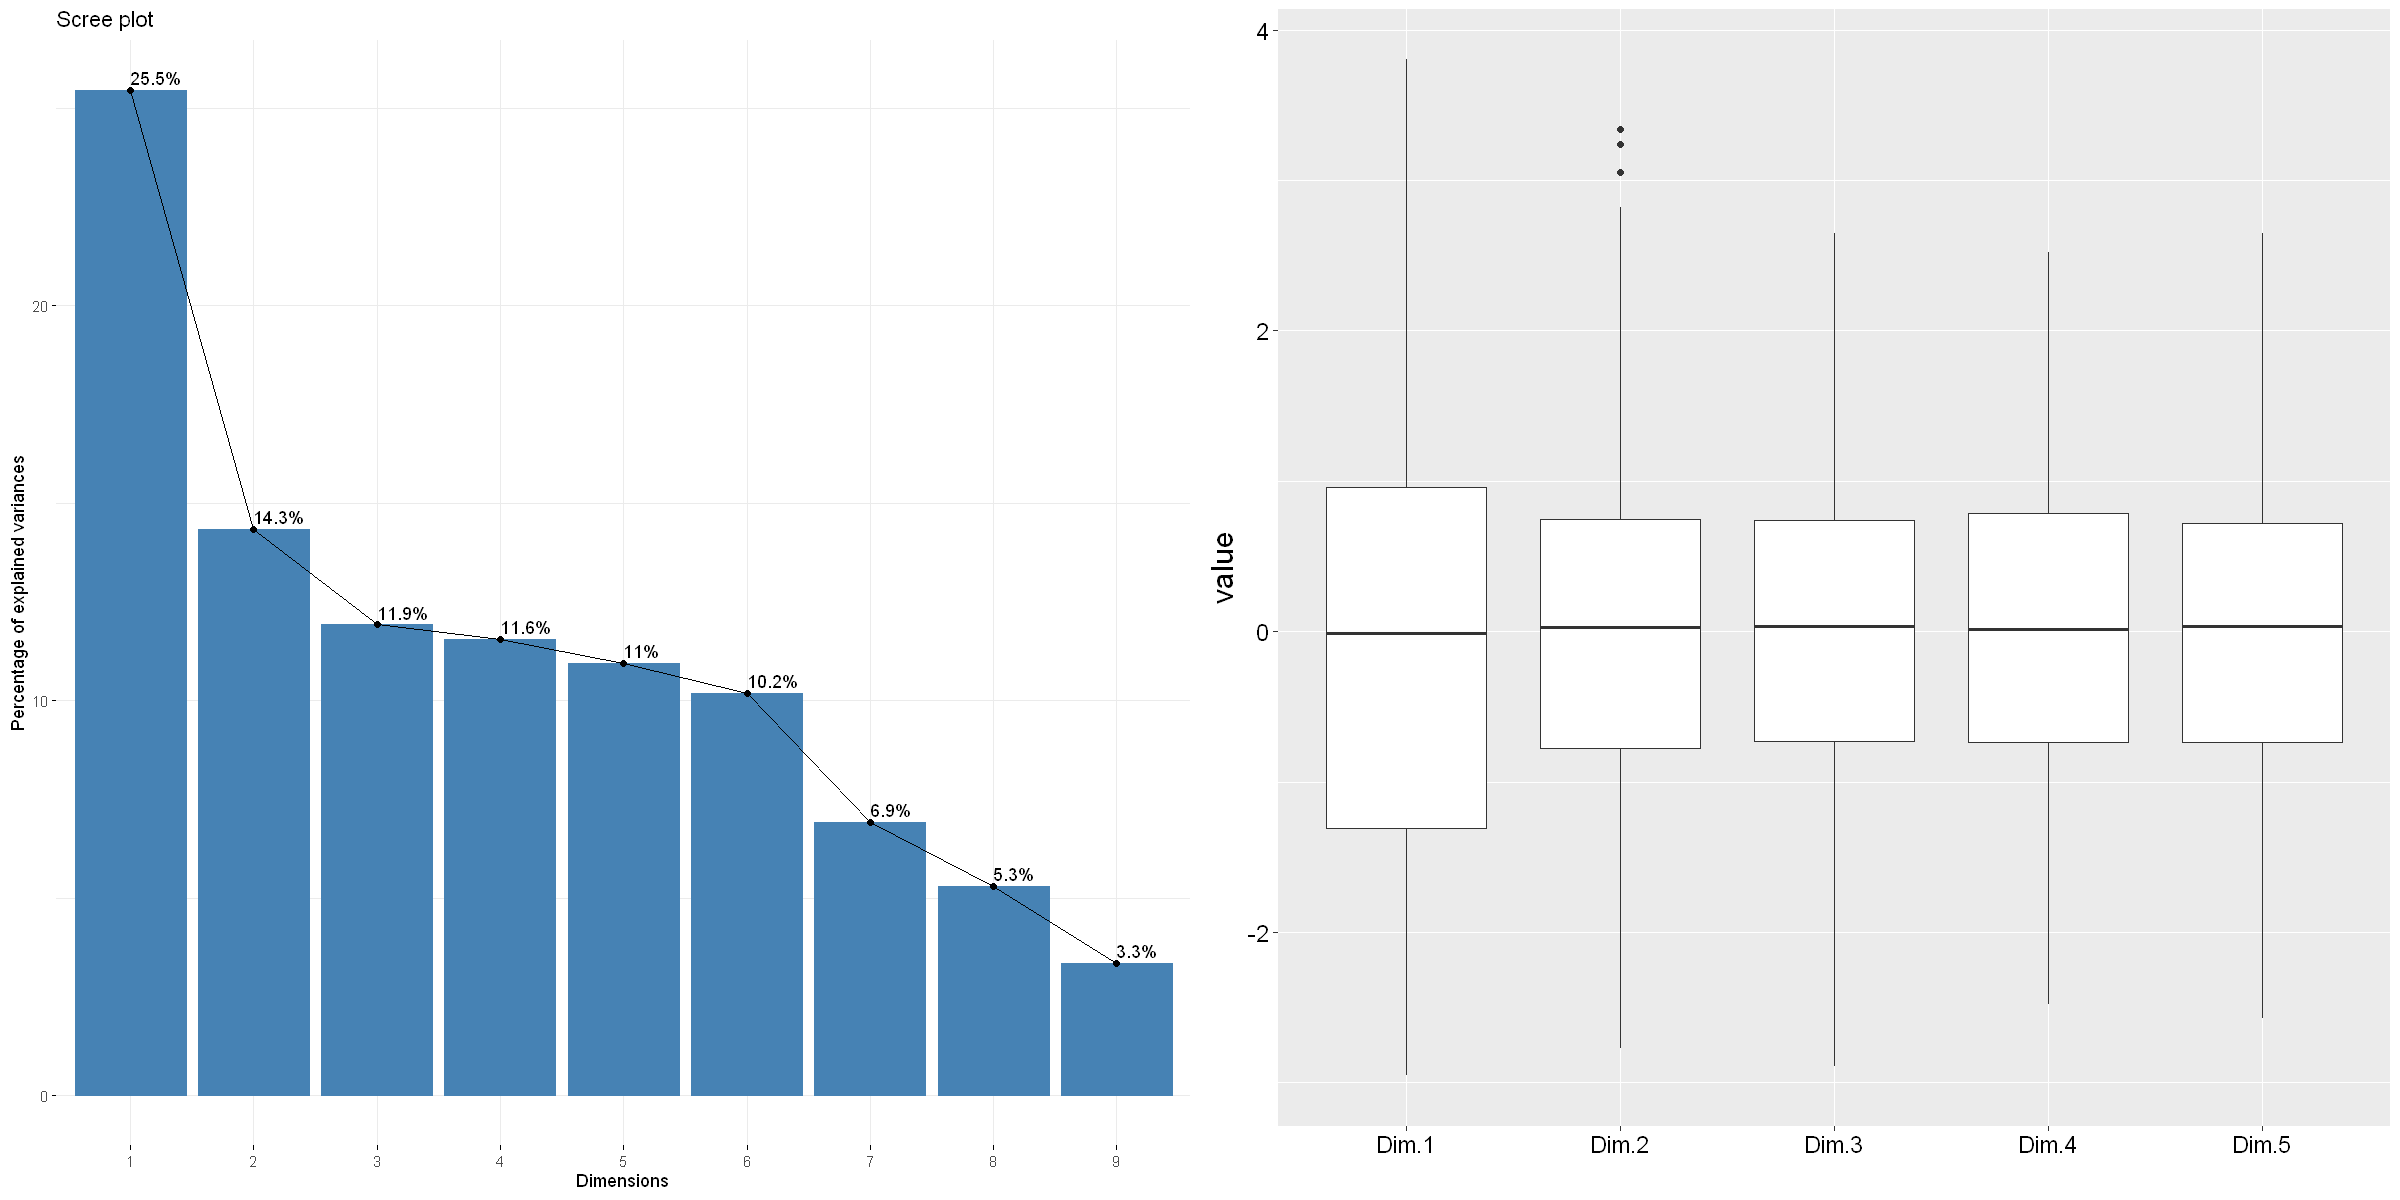

In [103]:
# Analyse en composantes principales
acp <- PCA(gym_analyse, scale.unit = TRUE, graph = FALSE, quali.sup = c(2, 10, 13, 14) , quanti.sup = c(9,15), ncp = 5)
# summary(acp)

# D√©croissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE)
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)


L‚Äôanalyse des valeurs propres montre une structure multidimensionnelle des donn√©es. La m√©thode du coude, sugg√®re de retenir **2 voire 3 composantes** (39% ou 51% d‚Äôinertie), mais celles-ci ne suffisent pas √† r√©sumer l‚Äôinformation. **Pour capturer 80% de la variance, 6 composantes sont n√©cessaires**, ce qui indique que les variables explicatives sont relativement ind√©pendantes ou que plusieurs facteurs latents contribuent √† la variabilit√© des donn√©es.

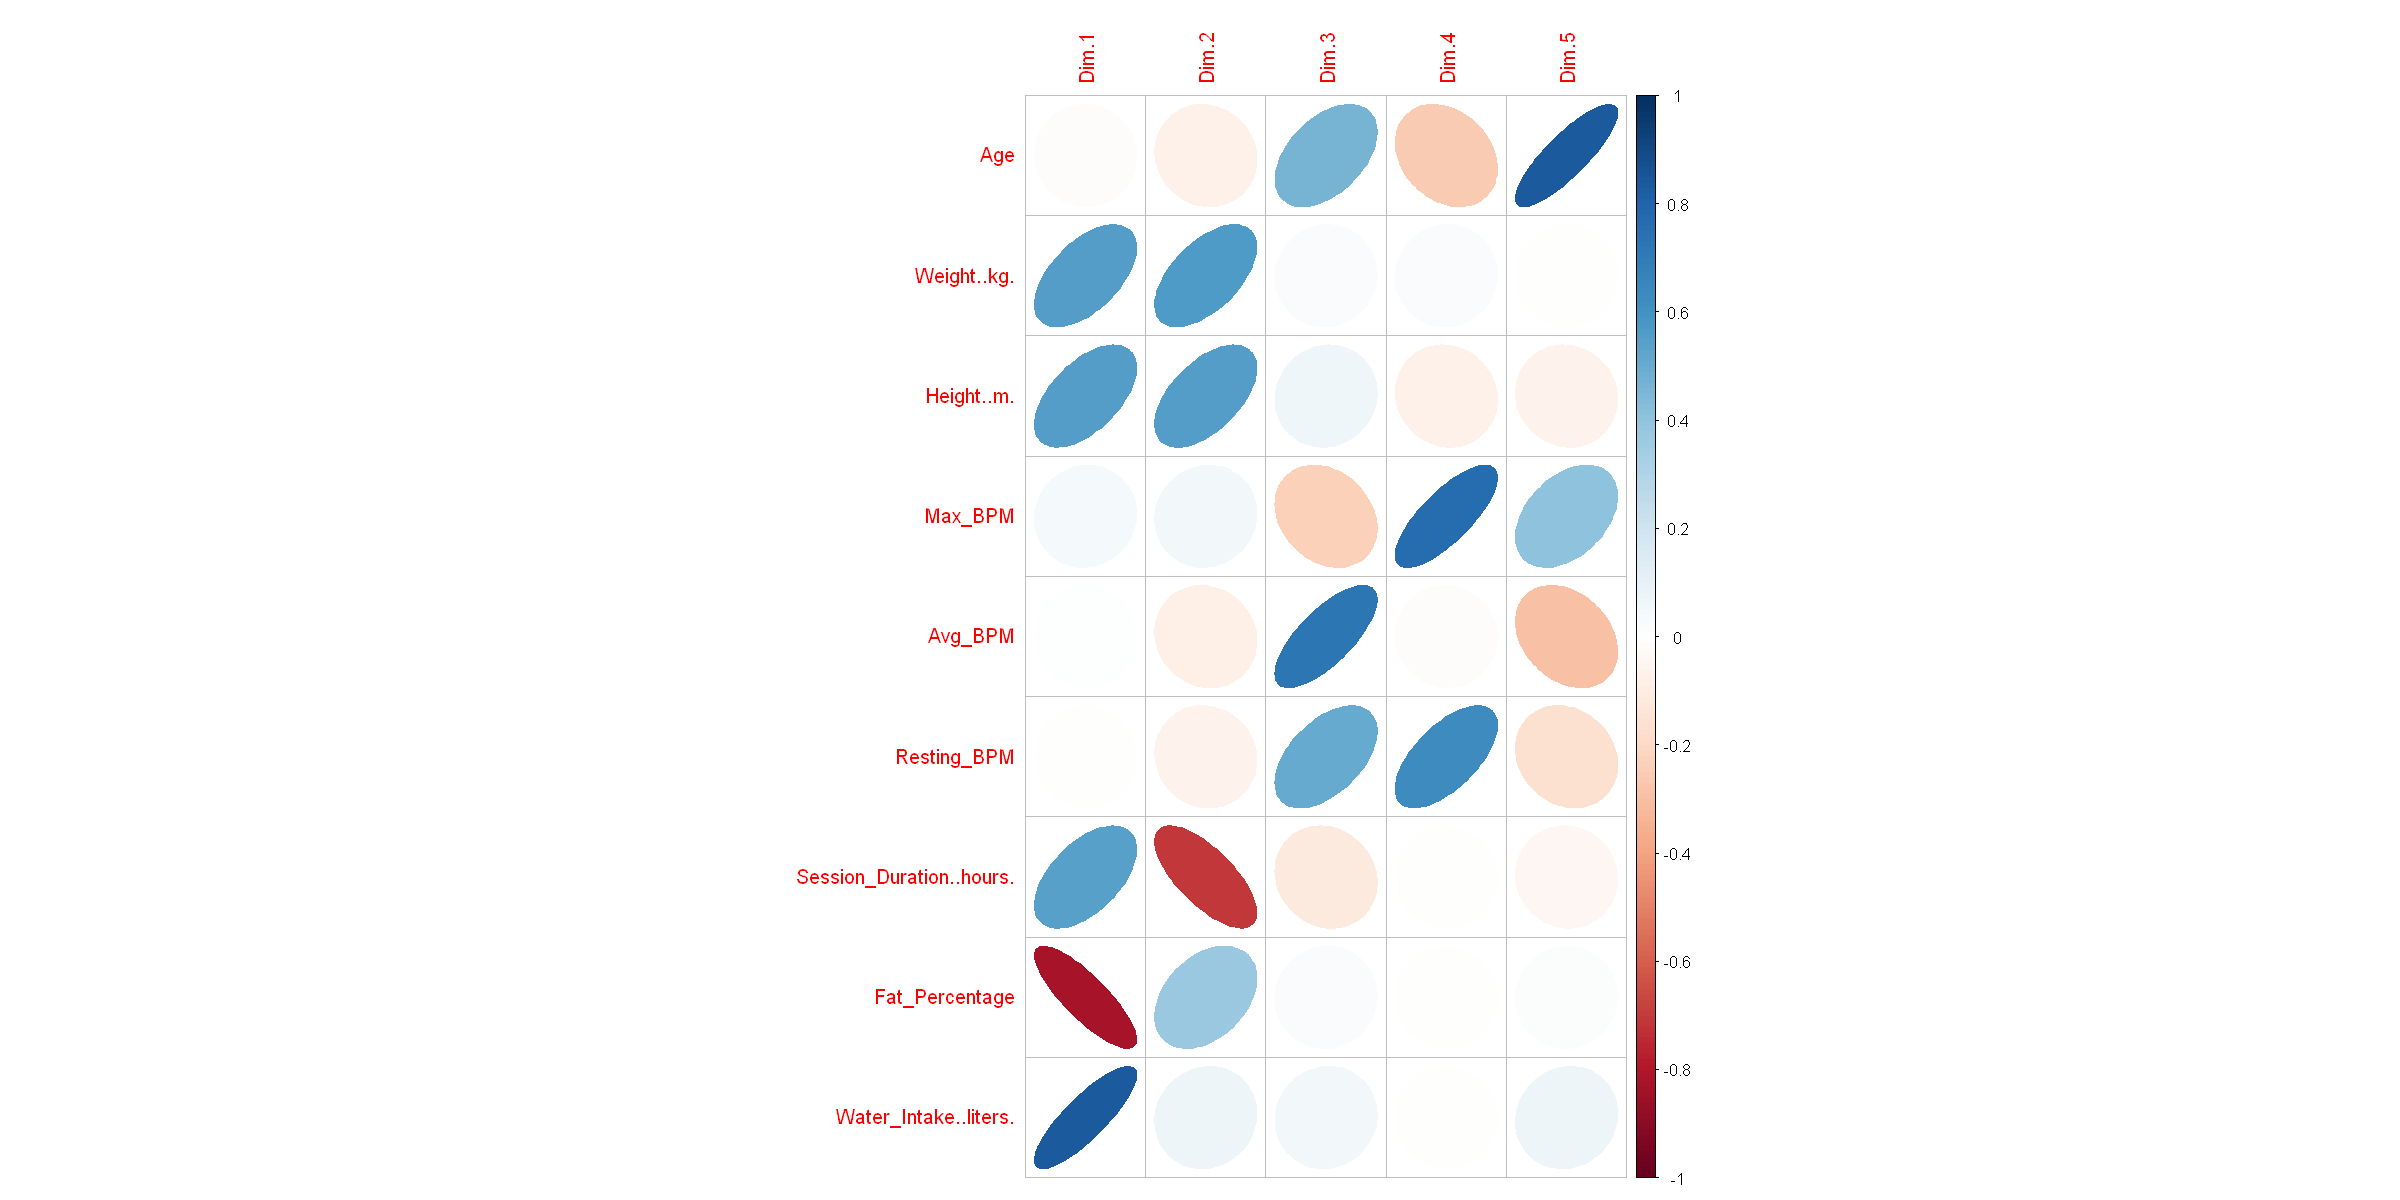

In [96]:
corrplot(acp$var$cor, is.corr=TRUE,method="ellipse")

L'analyse du graphique des correlations des variables d'int√©r√™t avec les dimensions r√©duites indique :

- les variables `LWeight`, `Height`, `Session_Duration..hours.`, `SFat_Percentage`, `Water_Intake..liters` contribuent fortement √† la premi√®re dimension.
- pour la deuxi√®me dimension, on retrouve `LWeight`, `Height` et `Session_Duration..hours.`, mais cette fois-ci, `Session_Duration..hours.` est oppos√© au deux autres.
- les variables `Age`, `Max_BPM`, `Avg_BPM` et `Resting_BPM` contribuent √† la troisi√®me dimension. 

Analysons d√©sormais leur effets sur les graphes des variables ci-dessous.

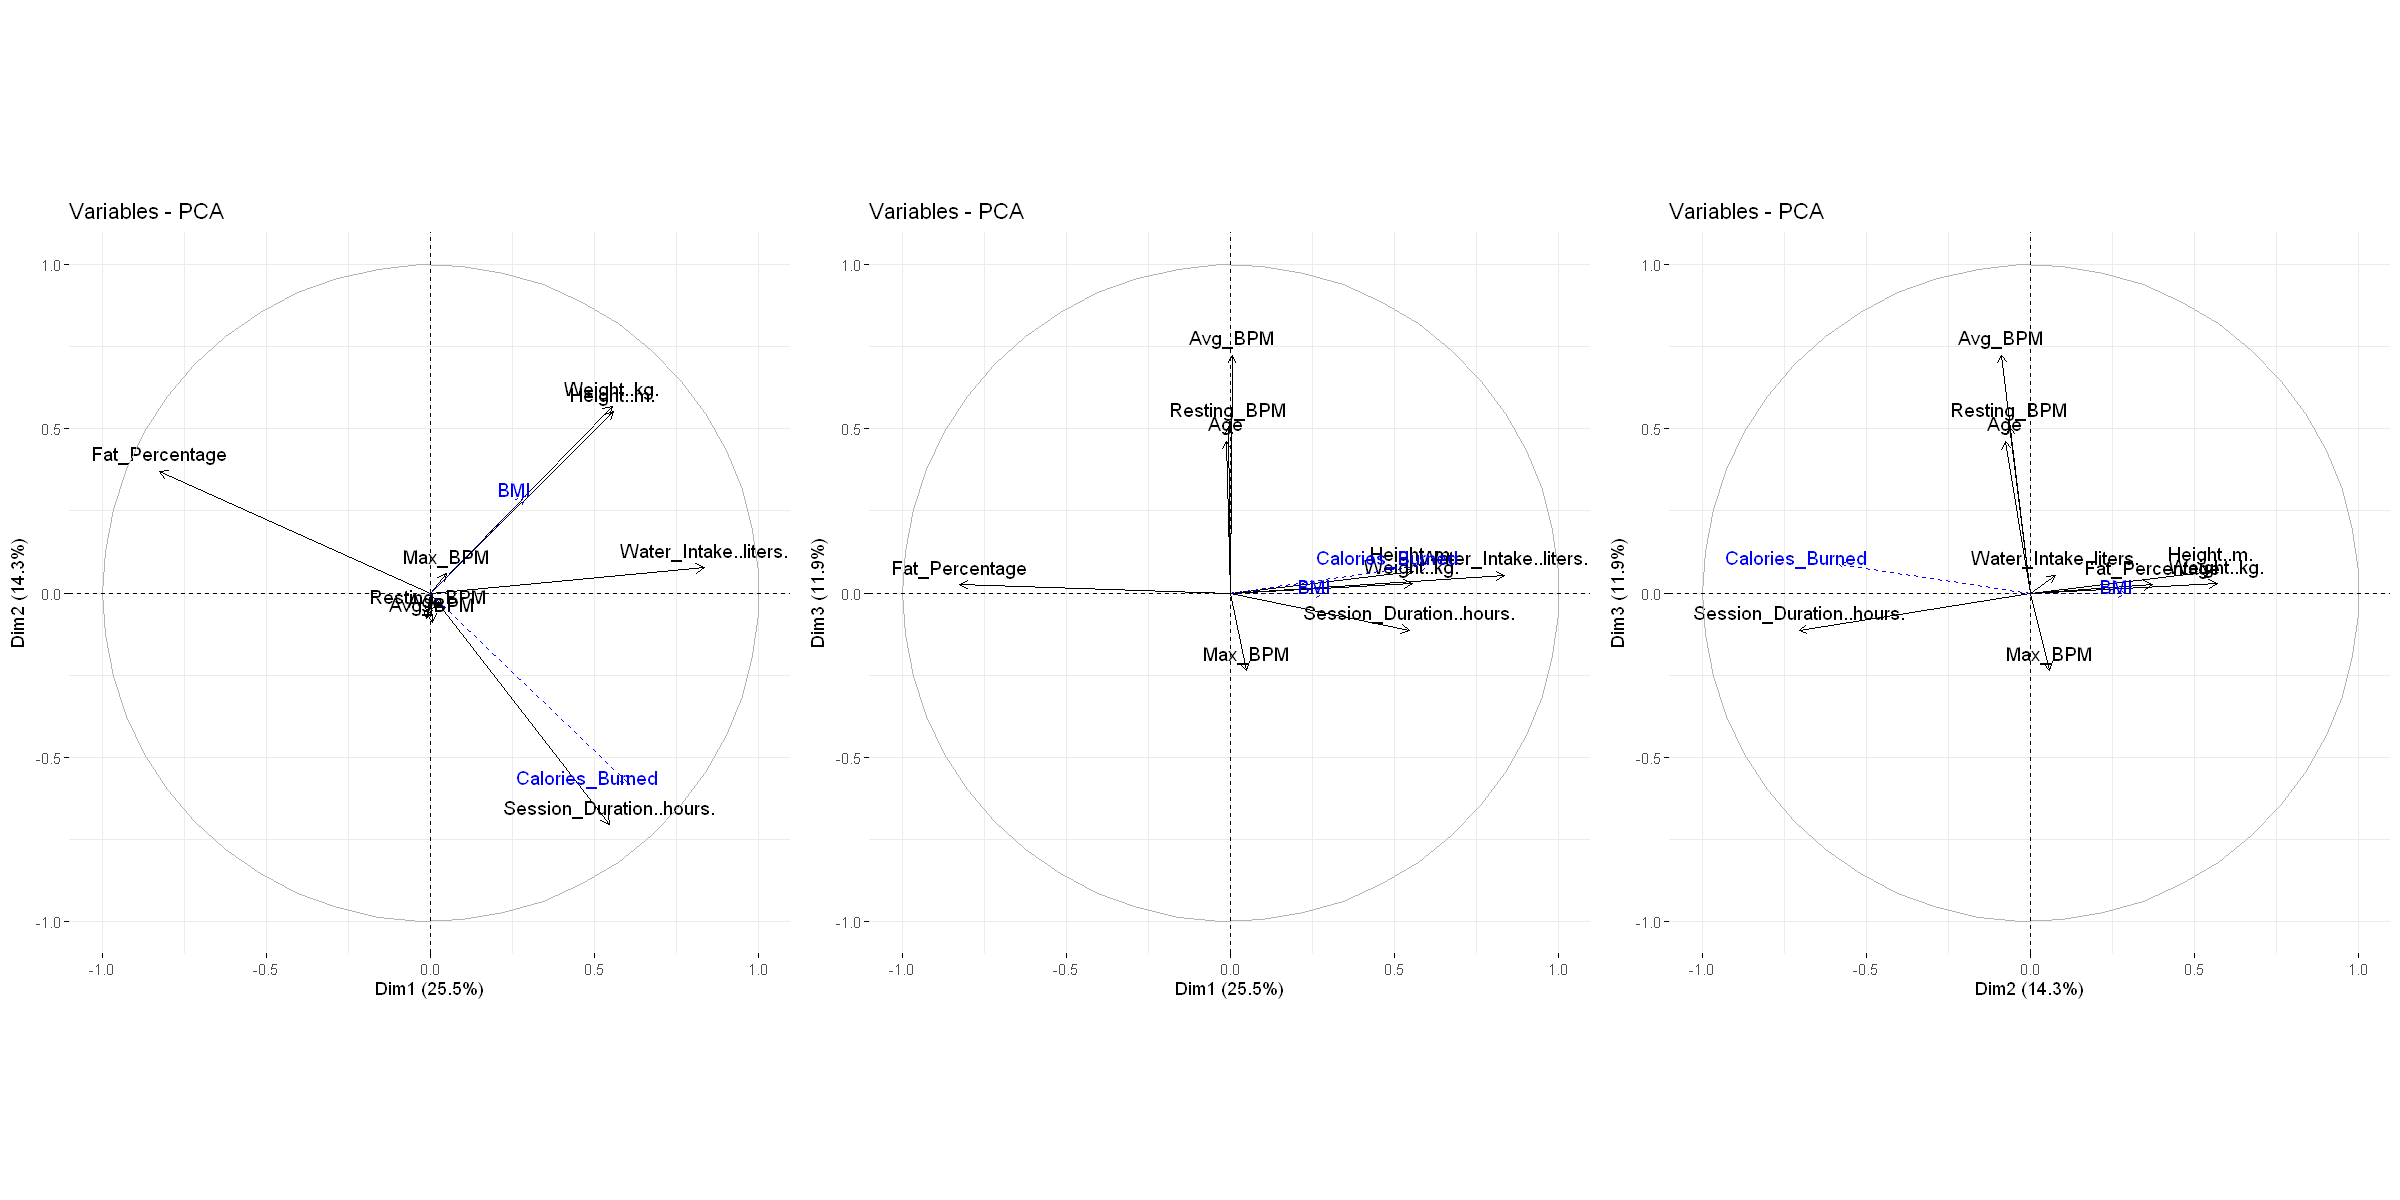

In [102]:
g1 <- fviz_pca_var(acp,axes=c(1,2))
g2 <- fviz_pca_var(acp,axes=c(1,3))
g3 <- fviz_pca_var(acp,axes=c(2,3))

grid.arrange(g1, g2, g3, ncol = 3)
rm(g1, g2, g3)

Les trois graphiques ci-dessus repr√©sentent la projection des features et de notre variable d'int√™ret `Calories_Burned` selon les dimensions (1, 2 ou 3).

- Sur les graphiques 1 et 3, on remarque que notre variable d'int√™ret `Calories_Burned` est fortement corr√©l√©e lin√©airement √† `Session_Duration..hours.`, ce qui sugg√®re que **le nombre de calories d√©p√©nd fortement de la dur√©e de l'entra√Ænement**.
- Sur le 1er graphique, on remarque que `Weight` et `Height` sont tr√®s fortement corr√©l√©s lin√©airement, ce qui impliquerait que **plus un individu est grand, plus il est lourd**.
- Sur le 1er graphique, on remarque que, selon la 2e dimension,  `Fat_Percentage` et `Water_Intake..liters.` sont n√©gativement corr√©l√©s lin√©airement, ce qui sugg√®re que **les individus √† faible masse grasse auront tendance √† boire plus d'eau que les autres**. On retrouve cette corr√©lation lin√©aire sur le 2e graphique selon la 3e dimension cette fois-ci.
- Enfin, sur les graphiques 2 et 3, on remarque que les variables `Age`, `Max_BPM`, `Avg_BPM` et `Resting_BPM` sont lin√©airement corr√©l√©es, en soulignant que la variable `Max_BPM` est corr√©l√©e n√©gativement par rapport aux autres. Dans une moindre mesure, cela pourrait impliquer que :
    - **la fr√©quence maximale lors d'un effort** d'un individu **diminue avec l'√¢ge**.
    - **Les efforts requierent un BPM moyen plus elev√© lorsque l'√¢ge augmente**, √† moins que les personnes plus ag√©es pr√©f√®rent des efforts impliquant un BPM moyen plus √©l√©v√© (course √† pied, HIIT) mais cela sera v√©rifi√© avec la variable quantitative `Workout_Type`.
    - Enfin, il semblerait que **la fr√©quence cardiaque au repos augmente avec l'√¢ge**.

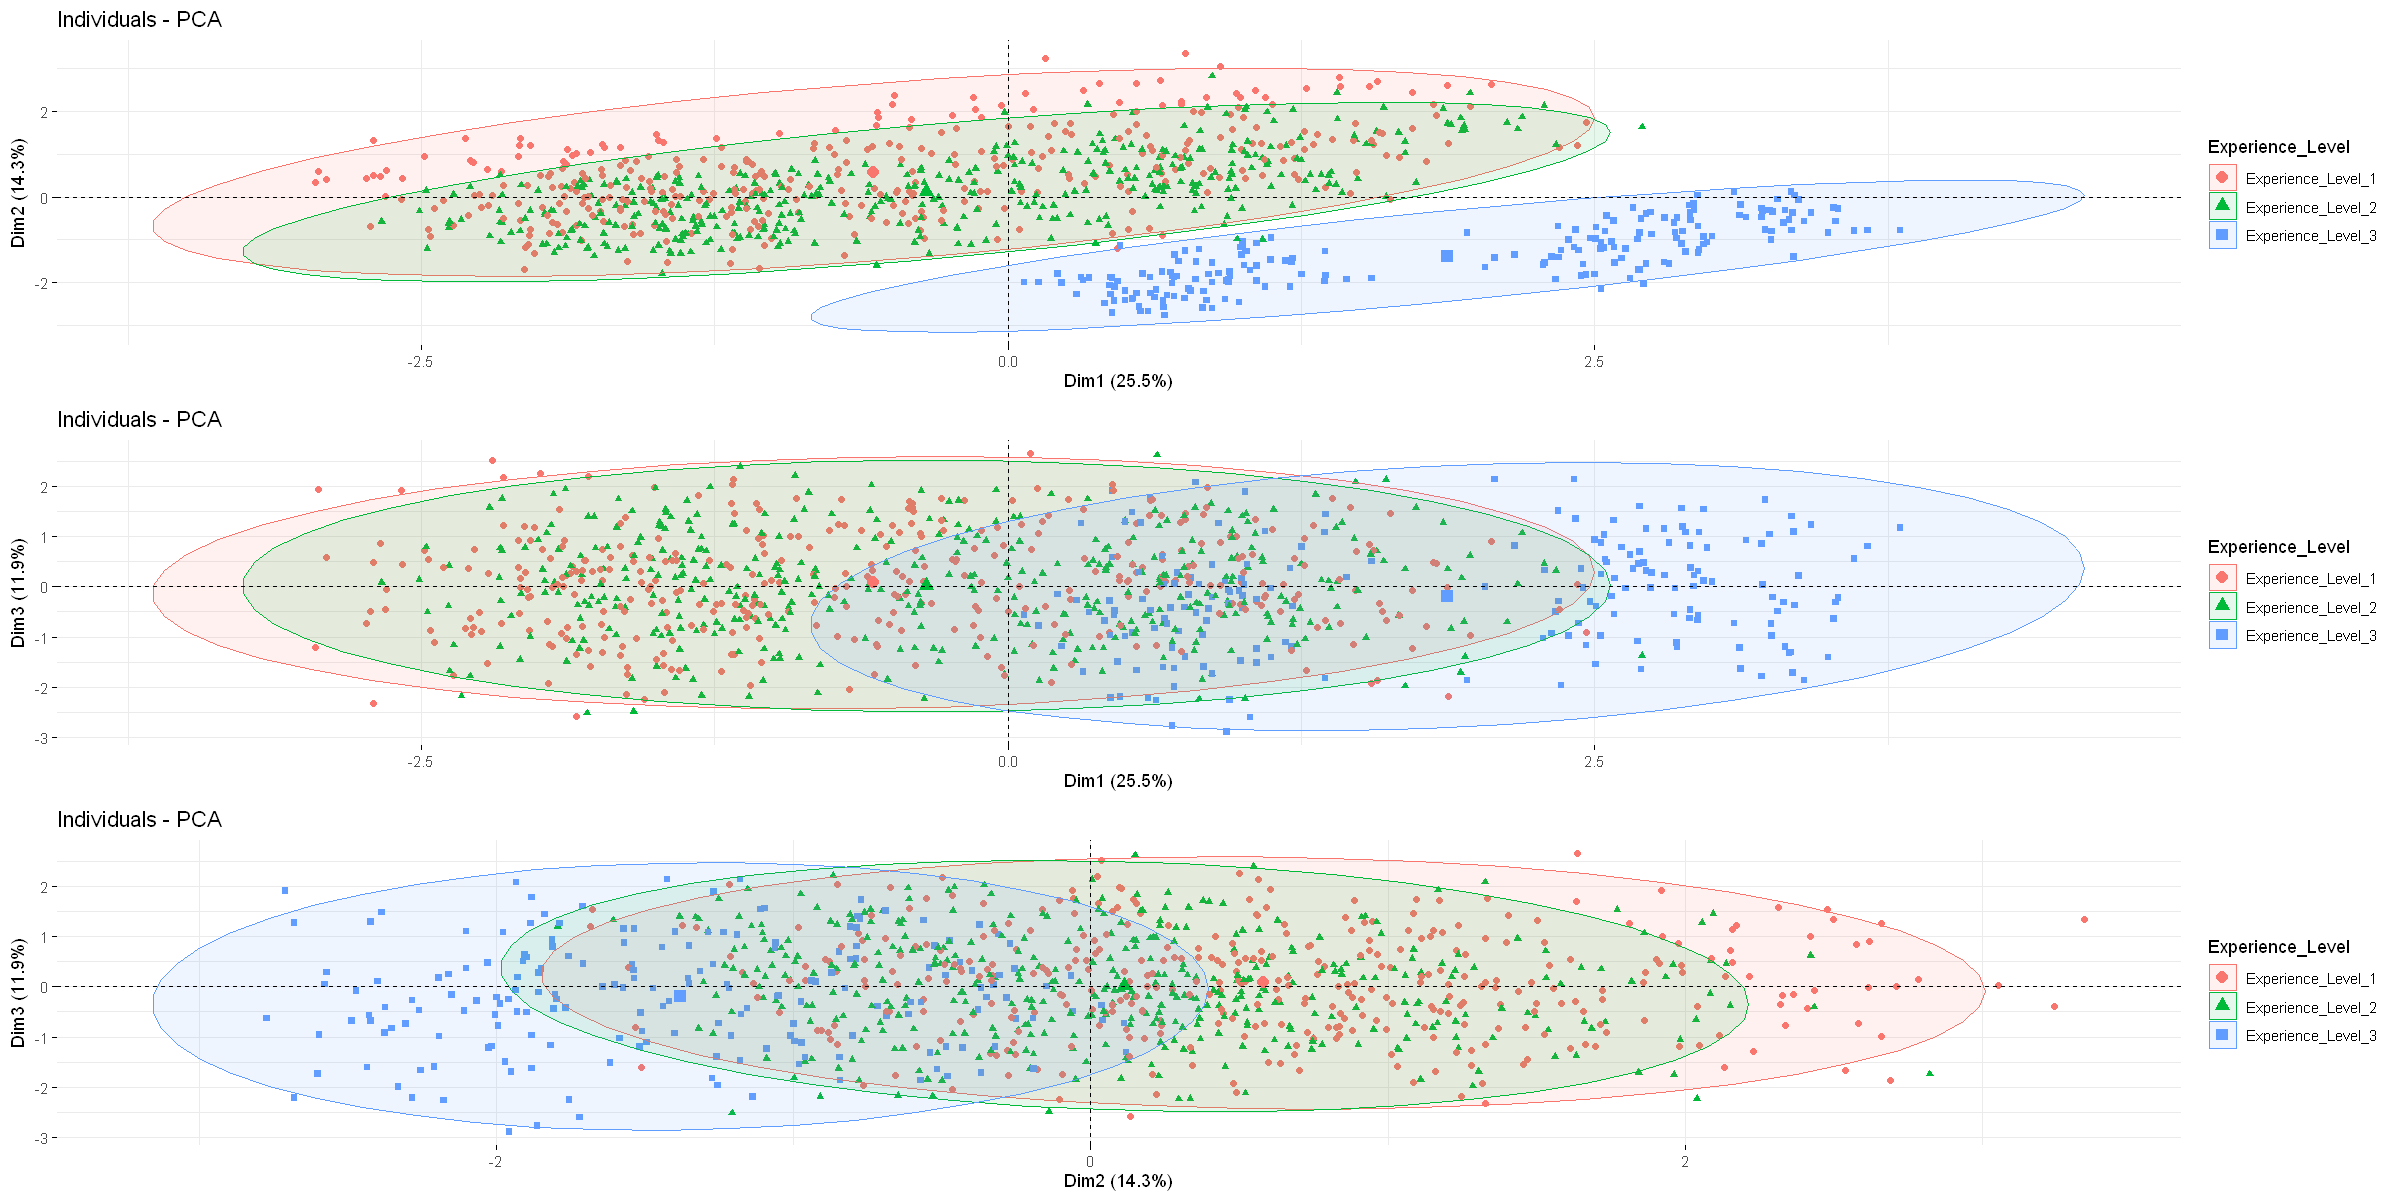

In [ ]:
g1 <- fviz_pca_ind(acp, label="none", habillage = 14, axes=c(1,2), addEllipses = TRUE)
g2 <- fviz_pca_ind(acp, label="none", habillage = 14, axes=c(1,3), addEllipses = TRUE)
g3 <- fviz_pca_ind(acp, label="none", habillage = 14, axes=c(2,3), addEllipses = TRUE)

grid.arrange(g1, g2, g3, ncol = 1)
rm(g1, g2, g3)

Les trois graphiques ci-dessus proj√®te les individus dans les principaux plans facotriels. Chaque individu est colori√© selon son niveau d'exp√©rience (`Experience_Level`), qui est notre seconde variable √† pr√©dire.

La projection des individus selon leur niveau d‚Äôexp√©rience r√©v√®le une s√©paration partielle dans l‚Äôespace des composantes principales. Les experts (niveau 3) se distinguent nettement des autres groupes dans le plan Dim.1-2, tandis que les d√©butants et interm√©diaires partagent des profils similaires. Bien que les structures de covariance soient homog√®nes (ellipses parall√®les), la discrimination compl√®te des trois niveaux n√©cessitera probablement une combinaison de mod√®les lin√©aires (pour isoler les experts) et non lin√©aires (pour diff√©rencier les non-experts)

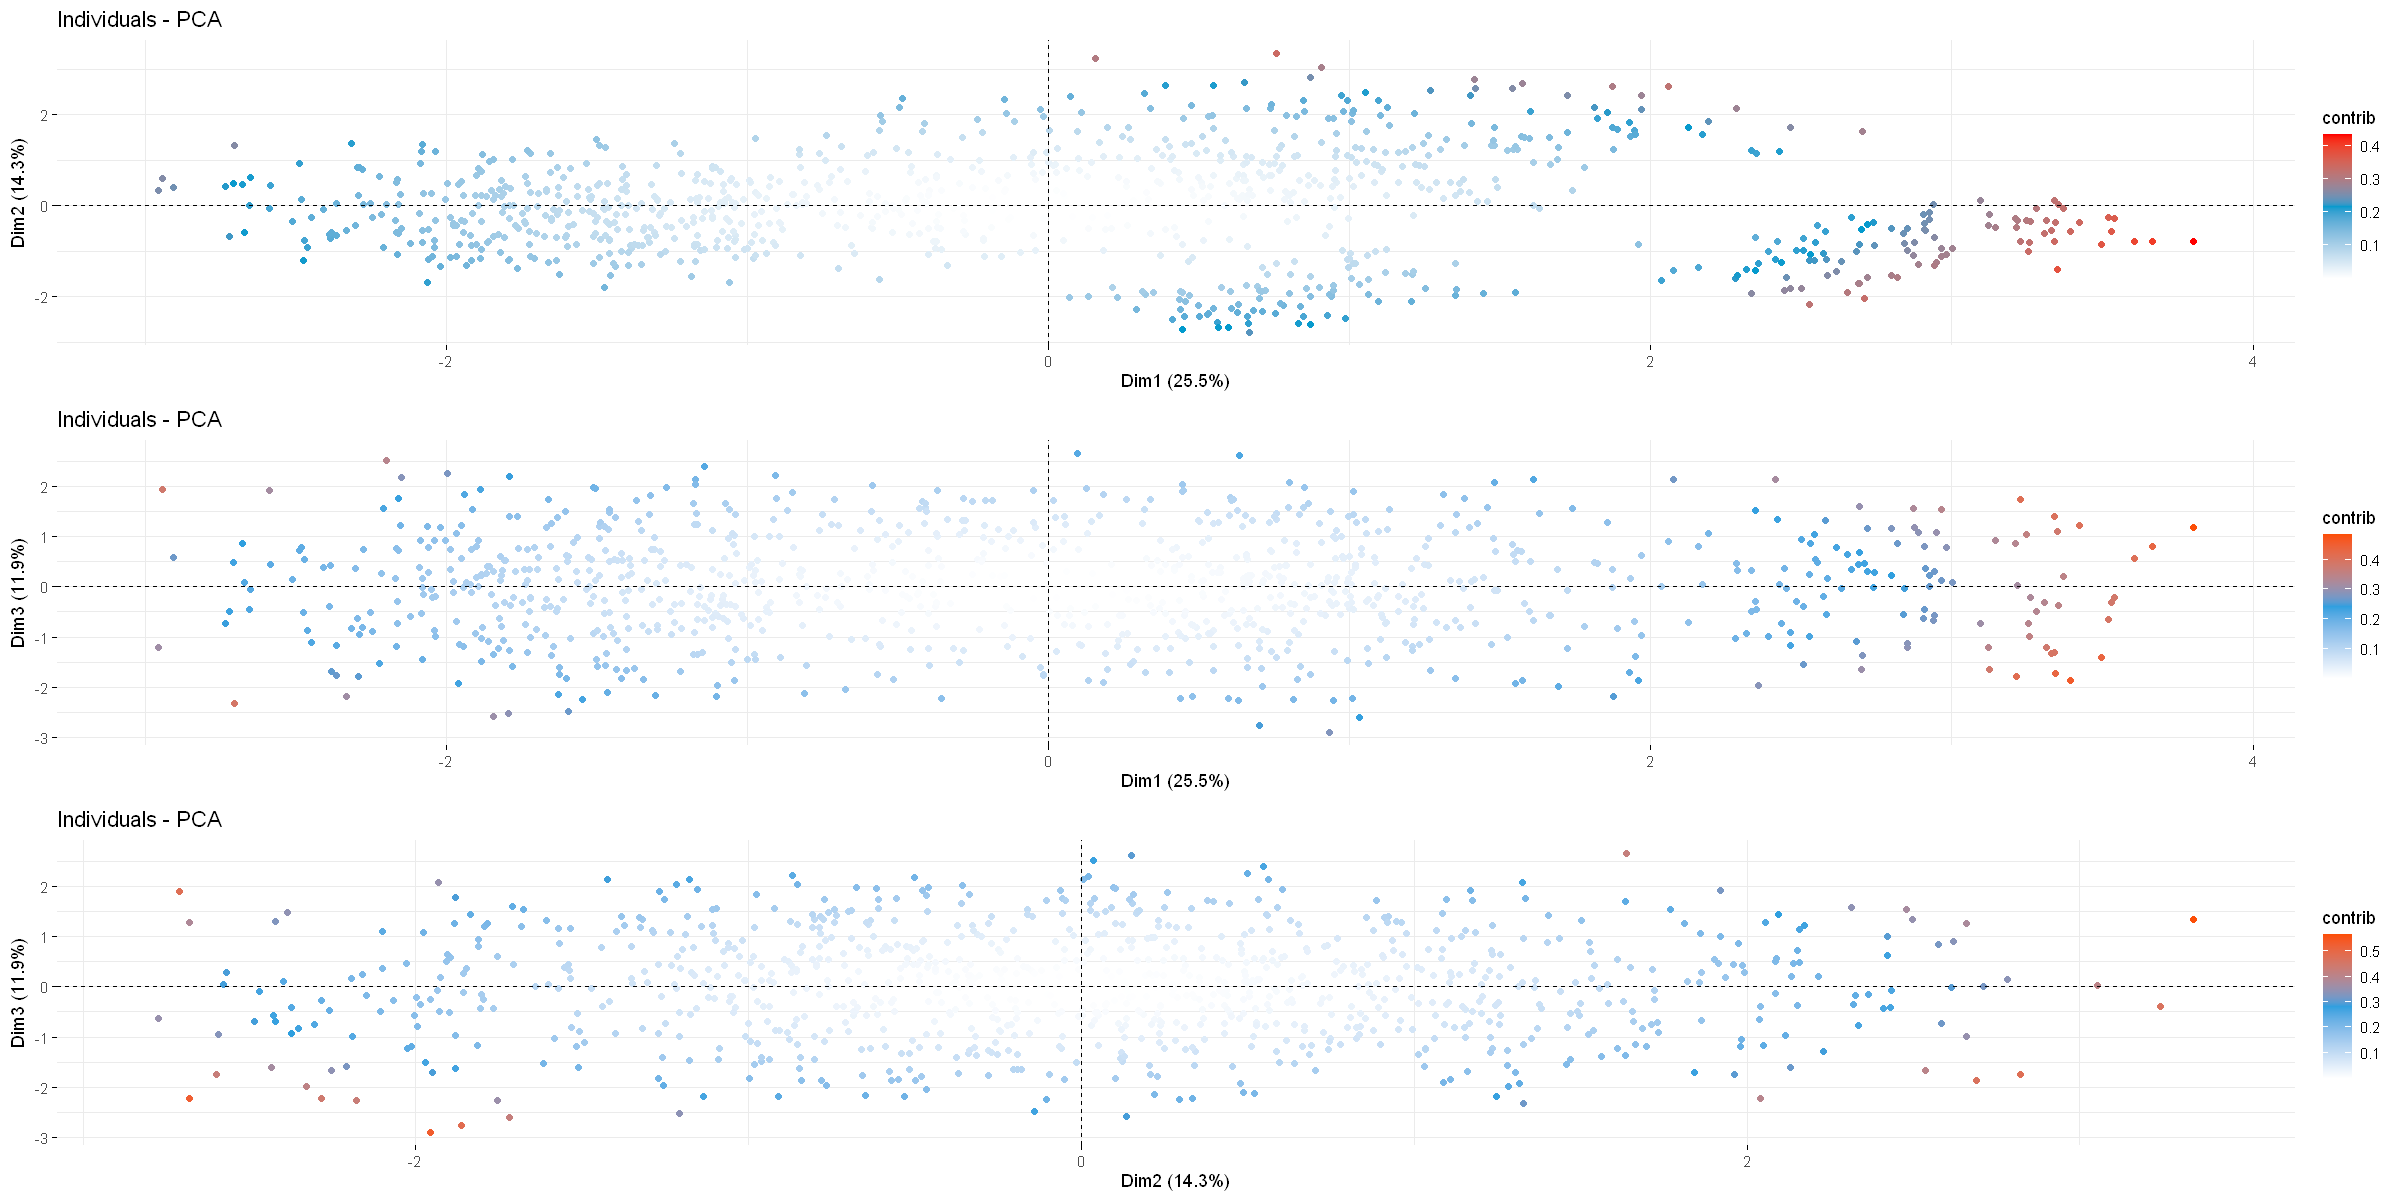

In [109]:
g1 <- fviz_pca_ind(acp,col.ind="contrib",label="true",gradient.cols = c("white", "deepskyblue3", "red" ))
g2 <- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
g3 <- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(2,3))

grid.arrange(g1, g2, g3, ncol = 1)
rm(g1, g2, g3)

Les trois graphiques ci-dessus proj√®te les individus dans les principaux plans facotriels, mais cette fois-ci, les individus sont colori√©s en fonction de leur contribution. La contribution d‚Äôun individu √† une composante **mesure son influence** sur la variance expliqu√©e par cette composante.

Les points en rouge correspondent aux individus ayant un poids disproportionn√© sur l‚Äôorientation des axes. Ils pourraient biaiser l'orientation des axes (ex: bodybuilders extr√™mes, d√©butants complets).

On retrouve en bas √† droite du 1er graphique un groupe d'outliers correspondant aux individus exp√©riment√©s (`Experience_Level` = 3). Certains poss√®dent une contribution tr√®s √©lev√©e sur la dimension 1 et il serait pertinent de v√©rifier leurs valeurs. Il correspondraient probablement √† des individus ayant des **morphotypes extr√™mes** (tr√®s grands/lourds, ou au contraire tr√®s petits/l√©ger), **excessivement sec** (masse grasse tr√®s faible) ou inversement. Il pourraient aussi correspondre √† des personnes **buvant √©norm√©ment ou peu d'eau**. On retrouve un r√©sultat similaire sur le graphique n¬∞2, selon la dimension 1, qui correspond s√ªrement au m√™me groupe de personnes.

On d√©tecte aussi les individus influents sur **l‚Äôinteraction entre dur√©e de s√©ance (Dim.2) et param√®tres cardiaques (Dim.3)**. Ils pourraient repr√©senter des individus √† **s√©ances tr√®s longues** et/ou √† **fr√©quences cardiaques extr√™mes**.

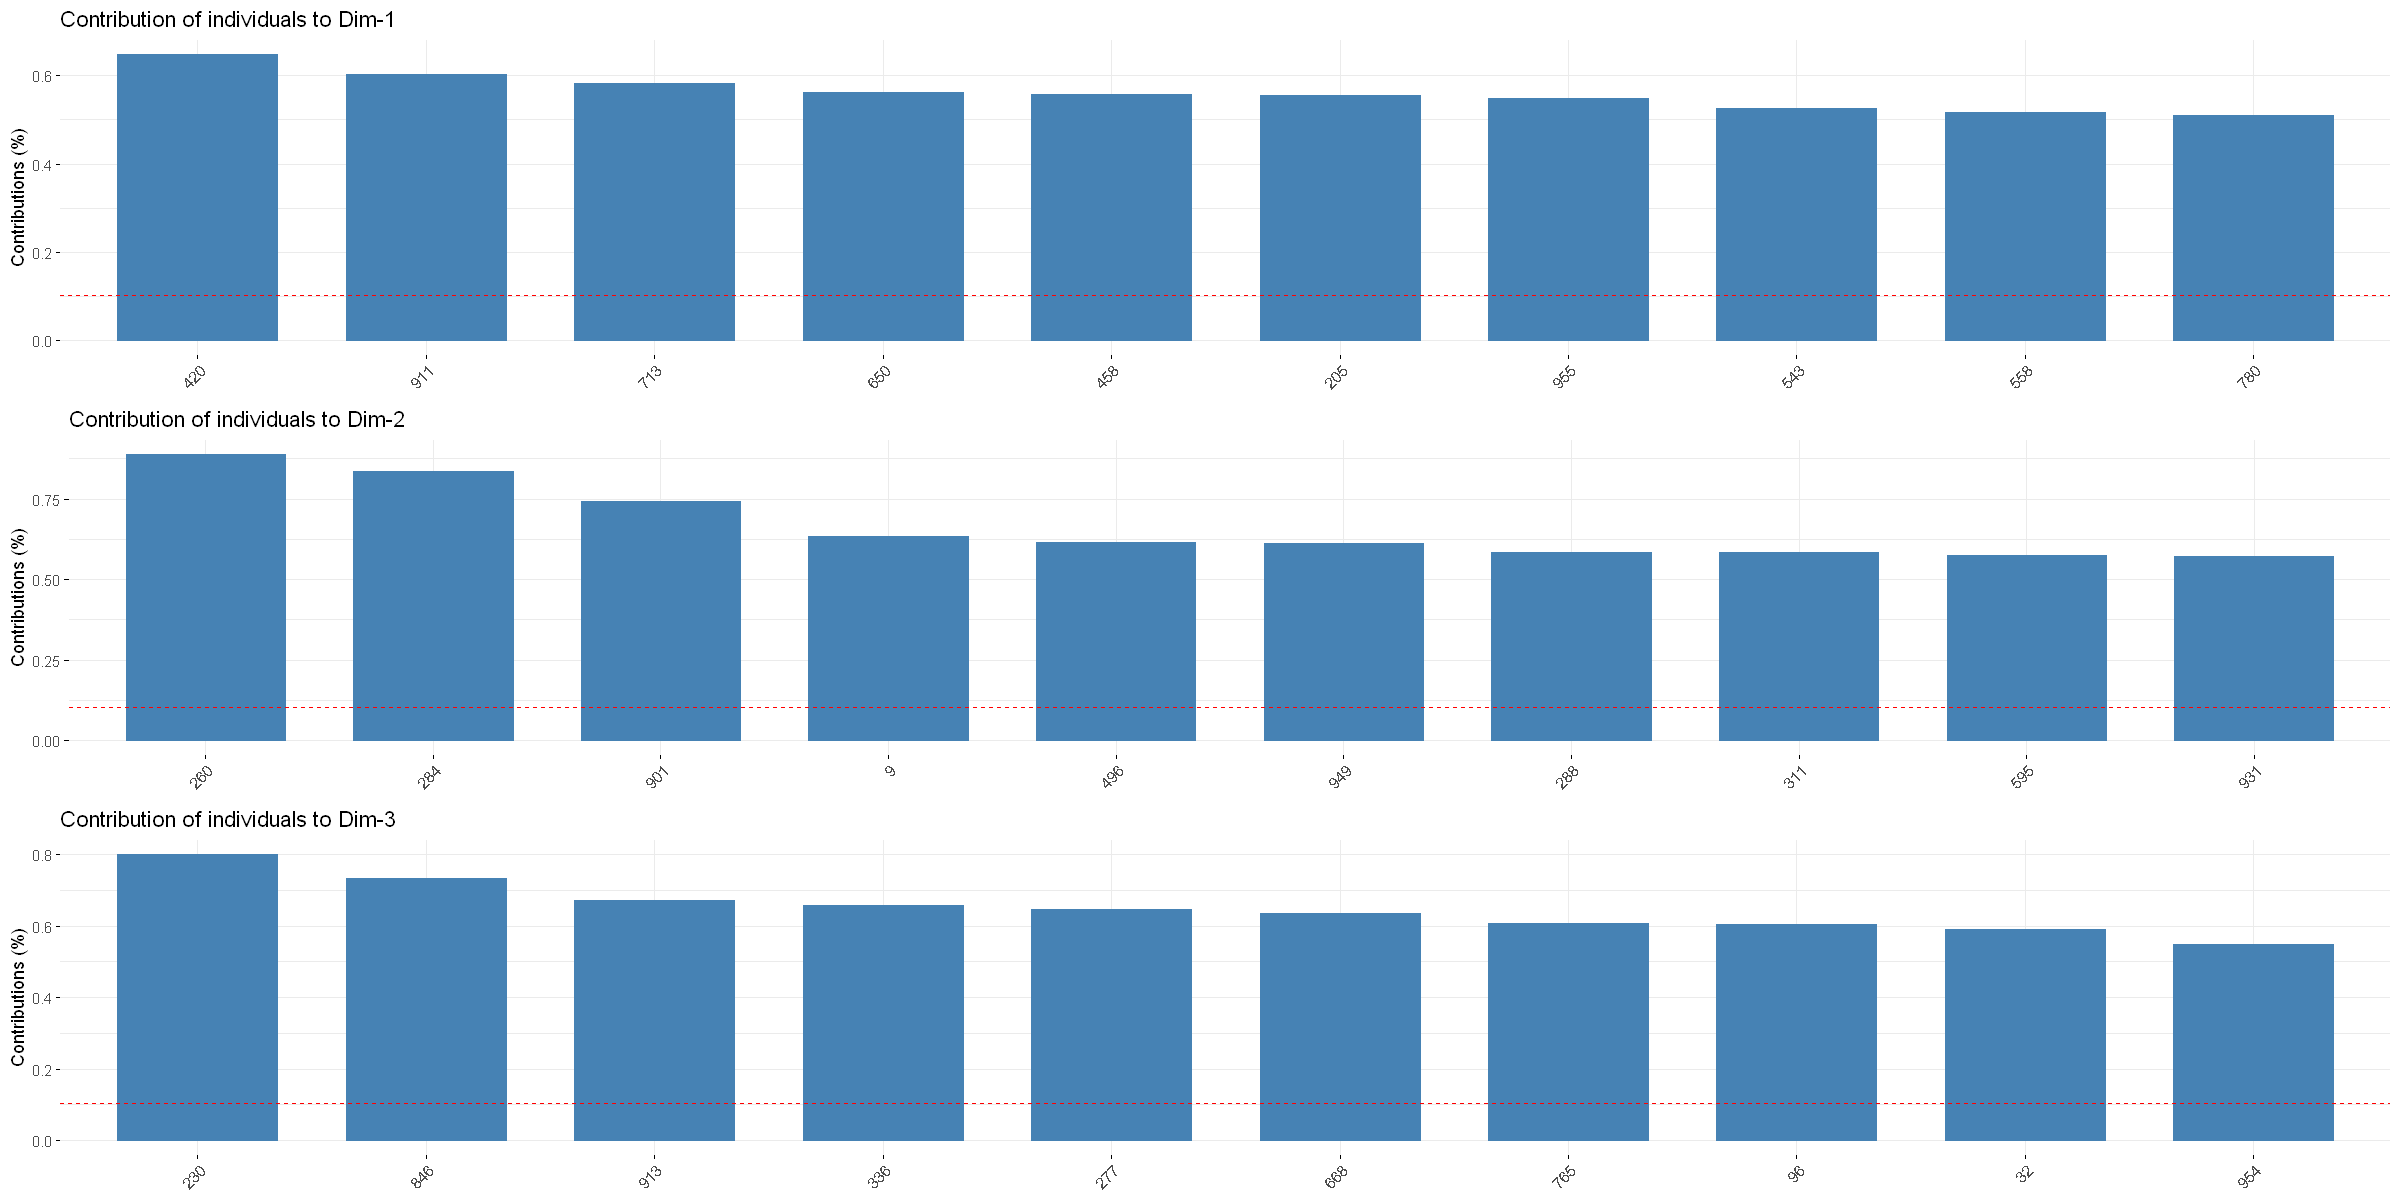

In [137]:
# analyse des outliers
g1 <- fviz_contrib(acp, choice = "ind", axes = 1, top = 10)
g2 <- fviz_contrib(acp, choice = "ind", axes = 2, top = 10)
g3 <- fviz_contrib(acp, choice = "ind", axes = 3, top = 10)

grid.arrange(g1, g2, g3, ncol = 1)
rm(g1, g2, g3)

In [138]:
# display the outliers : 420, 711, 713 and 650
gym_analyse_median <- apply(gym_analyse, 2, median)
print("Median values:")
gym_analyse_median
gym_analyse[c(420, 711, 713, 650),]

[1] "Median values:"


Age                        Gender 
                         "40"                        "Male" 
                  Weight..kg.                    Height..m. 
                      " 70.0"                        "1.71" 
                      Max_BPM                       Avg_BPM 
                        "180"                         "143" 
                  Resting_BPM      Session_Duration..hours. 
                         "62"                        "1.26" 
              Calories_Burned                  Workout_Type 
                       " 893"                    "Strength" 
               Fat_Percentage         Water_Intake..liters. 
                       "26.2"                         "2.6" 
Workout_Frequency..days.week.              Experience_Level 
                          "3"                           "2" 
                          BMI 
                      "24.16"

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM
420 47  Male    86.6       1.99       182     153     70         
711 38  Male   123.3       1.62       161     165     65         
713 19  Male    82.4       1.96       174     169     62         
650 27  Male    88.5       1.98       161     153     53         
    Session_Duration..hours. Calories_Burned Workout_Type Fat_Percentage
420 1.98                     1500            Strength     10.6          
711 1.34                     1216            Yoga         21.2          
713 1.90                     1766            HIIT         10.1          
650 1.80                     1515            Cardio       11.1          
    Water_Intake..liters. Workout_Frequency..days.week. Experience_Level BMI  
420 3.5                   4                             3                21.87
711 2.3                   4                             2                46.98
713 3.5                   5                             3                21.45
650 3.5                   4                             3                22.57

Selon la dim. 1, analysons les 4 individus ayant une forte contribution en les comparant √† la m√©diane du dataset, en regardant particuli√®rement `Weight`, `Height`, `Session_Duration..hours.`, `Fat_Percentage` et `Water_Intake`.

Les individus 420, 713 et 650 sont des individus **tr√®s grands**, (~1m97 par rapport √† la m√©diane = 1.71), **qui s'entrainent longuement** (~1.90 hours par rapport √† 1.26 hours), qui ont **une masse grasse bien en-dessous de la m√©diane** (~10.5% par rapport √† 26.2%) et **qui boivent beaucoup d'eau** (3.5 litres par rapport √† 2.6 litres). Ils correspondent tr√®s exactement aux valeurs extr√™mes dans les variables contribuant √©norm√©ment pour la dimension 1.

L'individu 711 en revanche est **tr√®s lourd et tr√®s petit**, et avec d'autres m√©triques dans la moyenne. Il correspond r√©ellement √† une valeur compl√®tement abb√©rante.

In [139]:
# display the outliers for dim 2
gym_analyse[c(260, 284, 901, 9),]

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM
260 53  Male   125.1       1.91       171     137     70         
284 20  Male   128.4       1.92       167     145     57         
901 30  Male   120.3       1.96       171     136     65         
9   28  Male   121.7       1.94       185     127     52         
    Session_Duration..hours. Calories_Burned Workout_Type Fat_Percentage
260 0.52                     353             Strength     28.3          
284 0.63                     502             Cardio       26.1          
901 0.66                     494             Yoga         23.9          
9   1.03                     719             Strength     28.9          
    Water_Intake..liters. Workout_Frequency..days.week. Experience_Level BMI  
260 3.1                   2                             1                34.29
284 2.0                   2                             1                34.83
901 2.6                   2                             1                31.32
9   2.6                   4                             2                32.34

Selon la dim. 2, analysons les 4 individus ayant une forte contribution en les comparant √† la m√©diane du dataset, en regardant tout particuli√®rement le contraste entre  `Session_Duration..hours.` par rapport √† `Weight`, `Height` et `Fat_Percentage`.

Les 4 individus sont **tr√®s grand et lourds**, avec une masse grasse au-dessus de la m√©diane (except√© 284), et qui font des s√©ances **plut√¥t courtes** allant de 30 minutes √† 1h par rapport √† la m√©diane qui est de 1h15. Encore une fois, cela correspond √† des valeurs extr√™mes dans les variables contribuant majoritairement pour la dimension 2.

In [135]:
# display the outliers for dim 2 : 420, 711, 713 and 650
gym_analyse[c(230, 846, 913, 336),]

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM
230 18  Female  63.9       1.59       185     125     50         
846 23  Female  60.1       1.59       191     123     52         
913 55  Male   118.6       1.72       163     168     67         
336 59  Male    88.1       1.76       187     168     74         
    Session_Duration..hours. Calories_Burned Workout_Type Fat_Percentage
230 1.87                     1169            Strength     16.4          
846 1.80                     1107            HIIT         17.6          
913 0.77                      640            Strength     25.9          
336 1.35                     1123            Strength     26.9          
    Water_Intake..liters. Workout_Frequency..days.week. Experience_Level BMI  
230 2.7                   4                             3                25.28
846 2.7                   4                             3                23.77
913 2.6                   3                             1                40.09
336 3.0                   3                             2                28.44

Selon la dim. 3, analysons les 4 individus ayant une forte contribution en les comparant √† la m√©diane du dataset, en observant les variables `Age`, `Max_BPM`, `Avg_BPM` et `Resting_BPM`.

Les 4 individus sont en effet pl√ªtot **jeunes ou plut√¥t ag√©s**, et qui ont particuli√®rement un `Average_BPM` **plus √©lev√© ou plus faible** que la m√©diane (143 BPM).

In [99]:
# Linear Discriminant Analysis
# Let's use Experience_Level as the target variable
library(MASS)

# Create a dataframe with the quantitative variables and the target variable
gym_lda_data <- cbind(gym_quanti, Experience_Level = gym$Experience_Level)

# Perform LDA
lda_result <- lda(Experience_Level ~ ., data = gym_lda_data)

# Summary of the LDA model
lda_result$scaling

# Plot the LDA results
plot_lda <- plot(lda_result)

# Create better visualization with ggplot2
lda_pred <- predict(lda_result, gym_lda_data)
lda_df <- data.frame(
    LD1 = lda_pred$x[,1],
    LD2 = lda_pred$x[,2],
    Experience_Level = gym_lda_data$Experience_Level
)

# Visualize the LDA results
ggplot(lda_df, aes(x = LD1, y = LD2, color = Experience_Level)) +
    geom_point(size = 3, alpha = 0.7) +
    stat_ellipse() +
    labs(title = "LDA: Discrimination par niveau d'exp√©rience",
             x = "Premi√®re discriminante",
             y = "Deuxi√®me discriminante") +
    theme_minimal()



Attachement du package : 'MASS'


L'objet suivant est masqu√© depuis 'package:plotly':

    select


L'objet suivant est masqu√© depuis 'package:dplyr':

    select




ERROR: Error: objet 'gym_quanti' introuvable


### Interpretation des r√©sultats de la LDA sur Experience level: 
On observe du graphe que la LDA permet bien de s√©parer es Experts (3) sur l‚Äôaxe LD1, car ils sont clairement d√©cal√©s.
Mais elle a plus de mal entre D√©butants (1) et Interm√©diaires (2), qui se m√©langent beaucoup.
LD1 (axe horizontal - Premi√®re discriminante) :

- C‚Äôest l‚Äôaxe principal de s√©paration.
Variables qui contribuent le plus √† LD1 :

    Session_Duration (7.6756) : plus la dur√©e d'entra√Ænement est grande, plus √ßa tire vers la droite (plut√¥t vers les Experts).
    BMI (1.1431) : idem, un IMC plus √©lev√© pousse vers des valeurs positives de LD1.
    Weight (-1.6378) : plus le poids est faible, plus LD1 augmente (moins de poids ‚Üí potentiellement plus exp√©riment√© ?).

- Interpr√©tation :
Les Experts sont plut√¥t des personnes :

    Qui font des s√©ances plus longues.
    Qui ont un IMC plus √©lev√©.
    Et qui sont peut-√™tre plus ‚Äúl√©gers‚Äù (au sens du poids, vu le signe n√©gatif, mais √† v√©rifier avec les donn√©es).

LD2 (axe vertical - Deuxi√®me discriminante) :

- C‚Äôest l‚Äôaxe secondaire, qui affine la s√©paration (notamment entre classes 1 et 2). Variables qui contribuent le plus √† LD2 :

    Height (24.2335) : plus on est grand, plus on monte sur LD2.
    BMI (21.4079) : encore important ici.
    Weight (-22.3051) : plus le poids est faible, plus on monte sur LD2.

- Interpr√©tation :
LD2 semble capturer des diff√©rences morphologiques (taille/poids/IMC), qui aident surtout √† distinguer les individus entre D√©butants et Interm√©diaires, mais cette distinction reste difficile vu le chevauchement.